# Проект "Бурёнки"

### Описание проекта 
Фермер, владелец молочного хозяйства «Вольный луг» хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма». Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. Основной запрос в том, чтобы разработать прогнозные модели по удою и вкусу молока. 


**Основные задачи:**
- Провести предобработку данных
- Првоести исследовательский анализ данных
- Подготовить данные для модели
- Создать модель машинного обучения для поставленных целей
- Оптимизировать её

**data_main:**
- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

**dad**:
- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.

**data_cow**
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.stats import norm
import seaborn as sns
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
import math
from sklearn.preprocessing import LabelEncoder


In [2]:
try:
    data_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';')
except:
    data_main = pd.read_csv('C:/Users/simuk/Desktop/IT/проект/ferma_main.csv', sep = ';')

In [3]:
data_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [4]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [5]:
try:
    dad =  pd.read_csv('/datasets/ferma_dad.csv', sep= ';')
except:
    dad = pd.read_csv('C:/Users/simuk/Desktop/IT/проект/ferma_dad.csv', sep= ';')

In [6]:
dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [7]:
try:
    data_cow = pd.read_csv('/datasets/cow_buy.csv', sep= ';')
except:
    data_cow = pd.read_csv('C:/Users/simuk/Desktop/IT/проект/cow_buy.csv', sep= ';')

In [8]:
data_cow.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [9]:
data_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


**data_main**
- Данные в некоторых солбцах имеют некорректный тип данных по причине использования символа ",", а не ".". 
- На основании даных из этой таблицы можно будет найти взаимосвязь между особенностями корма и целевых показателей из основной задачи
- Графа "Возраст" не содержит числовой показатель

**data_cow**
- Анологичная проблема с символом ",", что и у основного датафрейма. 
- Этот датасет является тем, для которого нам надо построить модель машинного обучения

Этапы:
- Предобработка данных
- Исследовательский анализ данных
- Корреляционный анализ данных
- Модель регрессии
- Модель классификации
- Выводы

# Предобработка данных

In [10]:
data_name_df = [data_main, dad, data_cow]

**Задачи**
- Проверить датафреймы на корректность типов данных
- Проверить датафреймы на наличие дупликатов
- Проверить датафреймы на наличие пропусков
- Проверить датафреймы на наличие аномальных значений

In [11]:
def first_rem(name):
    name.columns = name.columns.str.lower()
    name.columns = name.columns.str.replace(' ', '_')
    print(name.isna().sum().sort_values(ascending = False))

In [12]:
for n in data_name_df:
    first_rem(n)
    


id                                       0
удой,_кг                                 0
эке_(энергетическая_кормовая_единица)    0
сырой_протеин,_г                         0
спо_(сахаро-протеиновое_соотношение)     0
порода                                   0
тип_пастбища                             0
порода_папы_быка                         0
жирность,%                               0
белок,%                                  0
вкус_молока                              0
возраст                                  0
dtype: int64
id          0
имя_папы    0
dtype: int64
порода                     0
тип_пастбища               0
порода_папы_быка           0
имя_папы                   0
текущая_жирность,%         0
текущий_уровень_белок,%    0
возраст                    0
dtype: int64


Все колонки привеены к нижнему регистру. Пропусков в данных не обнаружены

In [13]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   удой,_кг                               634 non-null    int64 
 2   эке_(энергетическая_кормовая_единица)  634 non-null    object
 3   сырой_протеин,_г                       634 non-null    int64 
 4   спо_(сахаро-протеиновое_соотношение)   634 non-null    object
 5   порода                                 634 non-null    object
 6   тип_пастбища                           634 non-null    object
 7   порода_папы_быка                       634 non-null    object
 8   жирность,%                             634 non-null    object
 9   белок,%                                634 non-null    object
 10  вкус_молока                            634 non-null    object
 11  возраст            

In [14]:
name_debug = ['спо_(сахаро-протеиновое_соотношение)', 'эке_(энергетическая_кормовая_единица)', 'жирность,%', 'белок,%']

In [15]:
def data_type_rem(name):
    data_main[f'{name}'] = pd.to_numeric(data_main[f'{name}'].str.replace(',', '.'))

In [16]:
for m in name_debug:
    data_type_rem(m)
#data_type_rem('эке_(энергетическая_кормовая_единица)')
#data_type_rem('спо_(сахаро-протеиновое_соотношение)')

In [17]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   удой,_кг                               634 non-null    int64  
 2   эке_(энергетическая_кормовая_единица)  634 non-null    float64
 3   сырой_протеин,_г                       634 non-null    int64  
 4   спо_(сахаро-протеиновое_соотношение)   634 non-null    float64
 5   порода                                 634 non-null    object 
 6   тип_пастбища                           634 non-null    object 
 7   порода_папы_быка                       634 non-null    object 
 8   жирность,%                             634 non-null    float64
 9   белок,%                                634 non-null    float64
 10  вкус_молока                            634 non-null    object 
 11  возрас

In [18]:
data_main.head()

,id,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [19]:
data_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   порода                   20 non-null     object
 1   тип_пастбища             20 non-null     object
 2   порода_папы_быка         20 non-null     object
 3   имя_папы                 20 non-null     object
 4   текущая_жирность,%       20 non-null     object
 5   текущий_уровень_белок,%  20 non-null     object
 6   возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [20]:
def data_type_rem(name):
    data_cow[f'{name}'] = pd.to_numeric(data_cow[f'{name}'].str.replace(',', '.'))

In [21]:
for m in ['текущая_жирность,%', 'текущий_уровень_белок,%']:
    data_type_rem(m)

In [22]:
data_cow.info()
data_cow.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   порода                   20 non-null     object 
 1   тип_пастбища             20 non-null     object 
 2   порода_папы_быка         20 non-null     object 
 3   имя_папы                 20 non-null     object 
 4   текущая_жирность,%       20 non-null     float64
 5   текущий_уровень_белок,%  20 non-null     float64
 6   возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Данные заменены с object на float в столбцах: эке, спо, жирность и белок в датафрейме data_main, а также в столбцах текущая жирность и текущий белок в датафрейме data_cow

In [23]:
for q in data_name_df:
   print(q.shape)
   print(q.duplicated().sum())

(634, 12)
5
(629, 2)
0
(20, 7)
4


In [24]:
data_main = data_main.drop_duplicates()
print(data_main.duplicated().sum())

0


По словам разработчиков проекта удалять явные дубликаты из датафрейма по коровам не нужно. Информацию предоставил Алексей наставник в нашем канале пачки от самих разработчиков.

In [25]:
data_main['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [26]:
data_main['порода_папы_быка'].unique()


array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [27]:
data_main['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [28]:
data_cow['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [29]:
data_main['вкус_молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [30]:
data_main['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [31]:
data_cow['тип_пастбища'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [32]:
data_cow['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [33]:
data_cow['имя_папы'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

In [34]:
data_main['тип_пастбища'] = data_main['тип_пастбища'].replace('Равнинные', 'Равнинное')
data_main['порода_папы_быка'] = data_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал')
data_main['порода'] = data_main['порода'].replace('Вис Бик Айдиал', 'Вис_Бик_Айдиал')
data_cow['порода'] = data_cow['порода'].replace('Вис Бик Айдиал', 'Вис_Бик_Айдиал')
data_main['порода'] = data_main['порода'].replace('РефлешнСоверинг', 'Рефлешн_Соверинг')
data_cow['порода'] = data_cow['порода'].replace('РефлешнСоверинг', 'Рефлешн_Соверинг')

C:\Users\simuk\AppData\Local\Temp/ipykernel_8452/2644058080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_main['тип_пастбища'] = data_main['тип_пастбища'].replace('Равнинные', 'Равнинное')
C:\Users\simuk\AppData\Local\Temp/ipykernel_8452/2644058080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_main['порода_папы_быка'] = data_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал')
C:\Users\simuk\AppData\Local\Temp/ipykernel_8452/2644058080.py:3: SettingWithCopyWarning: 
A value is trying 

In [35]:
print(data_main['тип_пастбища'].unique())
print(data_main['порода_папы_быка'].unique())
print(data_cow['порода_папы_быка'].unique())
print(data_main['порода'].unique())
print(data_cow['порода'].unique())

['Равнинное' 'Холмистое']
['Айдиал' 'Соверин']
['Айдиал' 'Соверин']
['Вис_Бик_Айдиал' 'Рефлешн_Соверинг']
['Вис_Бик_Айдиал' 'Рефлешн_Соверинг']


- Удалены явные дубликаты. Они могли возникнуть из-за ошибки урчного заполнения. 
- Удалены неявные дубликаты. Они могли возникнуть по технической причине. 

In [36]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     629 non-null    int64  
 1   удой,_кг                               629 non-null    int64  
 2   эке_(энергетическая_кормовая_единица)  629 non-null    float64
 3   сырой_протеин,_г                       629 non-null    int64  
 4   спо_(сахаро-протеиновое_соотношение)   629 non-null    float64
 5   порода                                 629 non-null    object 
 6   тип_пастбища                           629 non-null    object 
 7   порода_папы_быка                       629 non-null    object 
 8   жирность,%                             629 non-null    float64
 9   белок,%                                629 non-null    float64
 10  вкус_молока                            629 non-null    object 
 11  возрас

In [37]:
def barplot_function(name):
    try:
        plt.figure(figsize=(15, 15))
        data_main[f'{name}'].plot.box()
        plt.title(f'{name}')
        plt.show()
    except:
        pass
    print(data_main[f'{name}'].describe())

In [38]:
def barplot_function_1(name):
    try:
        plt.figure(figsize=(15, 15))
        data_cow[f'{name}'].plot.box()
        plt.title(f'{name}')
        plt.show()
    except:
        pass
    print(data_cow[f'{name}'].describe())

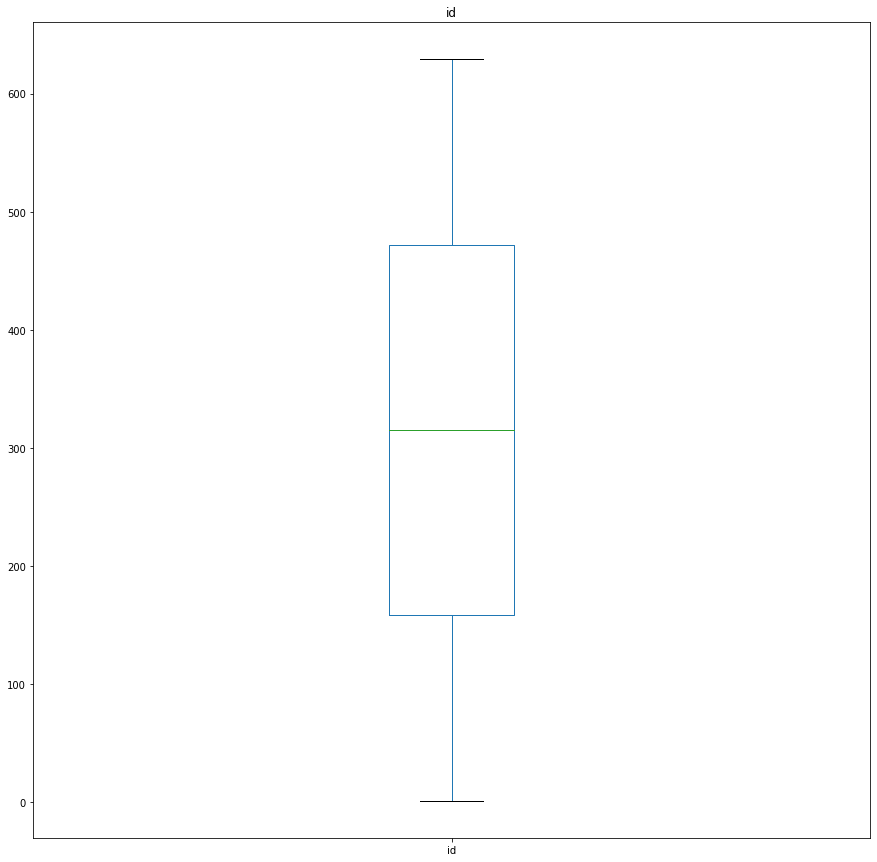

count    629.00000
mean     315.00000
std      181.72094
min        1.00000
25%      158.00000
50%      315.00000
75%      472.00000
max      629.00000
Name: id, dtype: float64


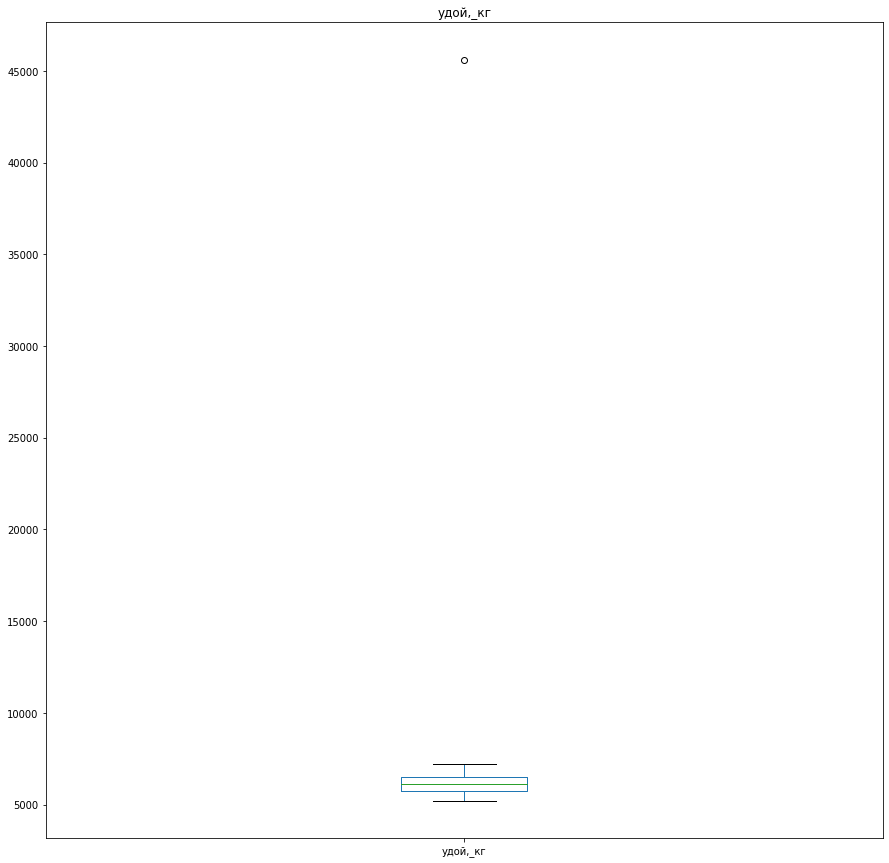

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой,_кг, dtype: float64


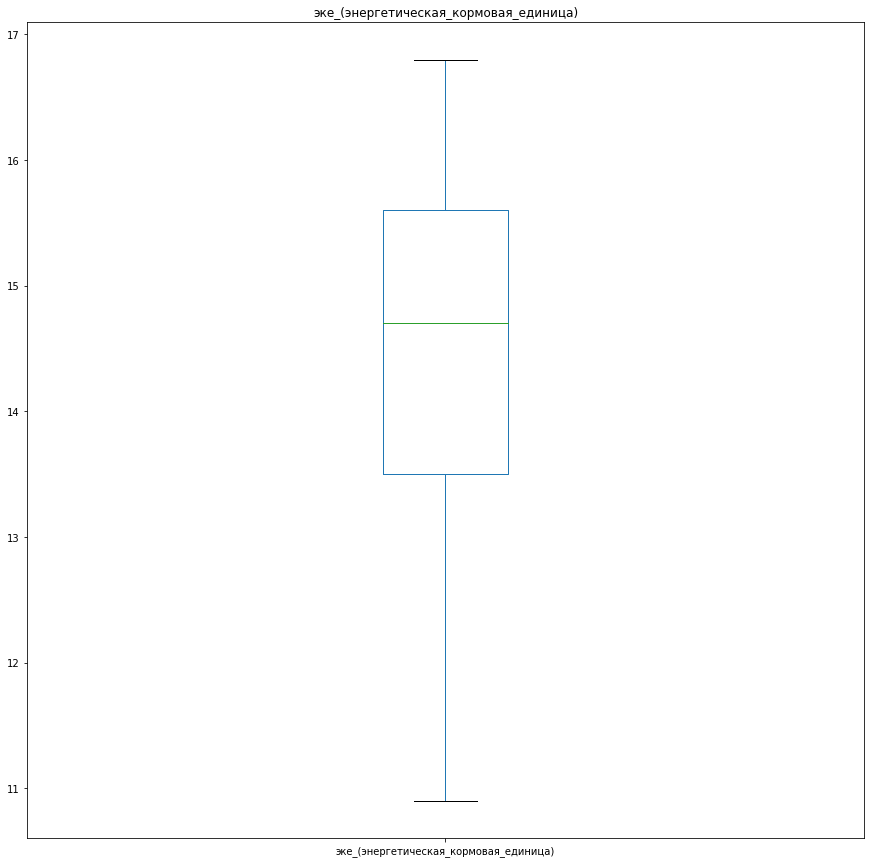

count    629.000000
mean      14.543879
std        1.306408
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке_(энергетическая_кормовая_единица), dtype: float64


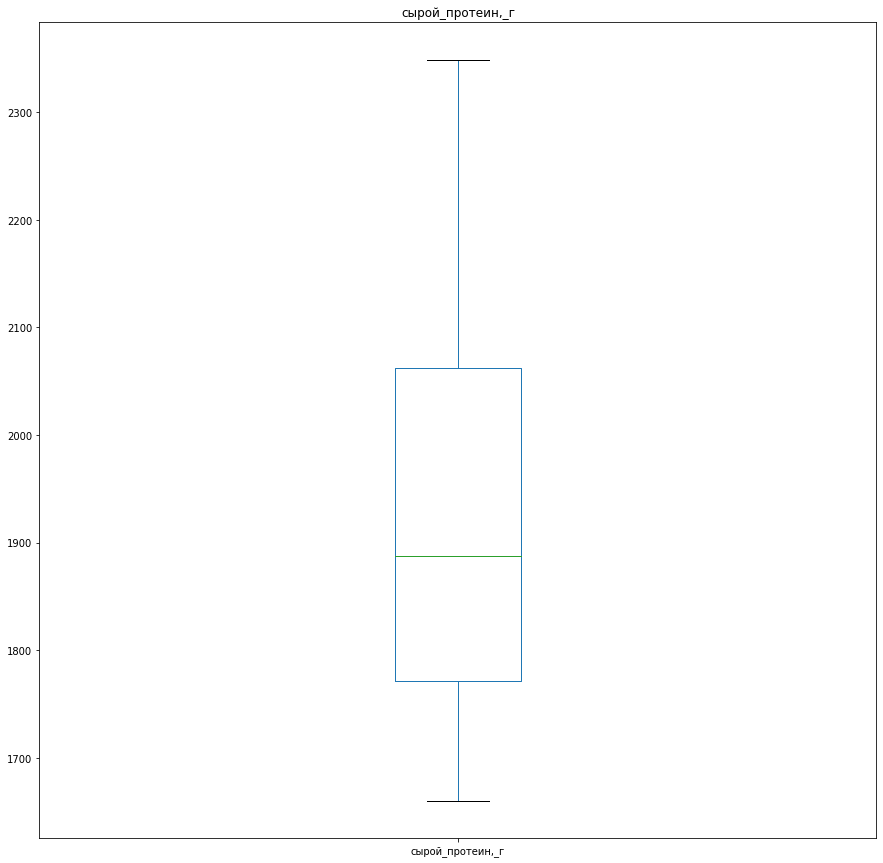

count     629.000000
mean     1923.364070
std       182.956251
min      1660.000000
25%      1771.000000
50%      1888.000000
75%      2062.000000
max      2349.000000
Name: сырой_протеин,_г, dtype: float64


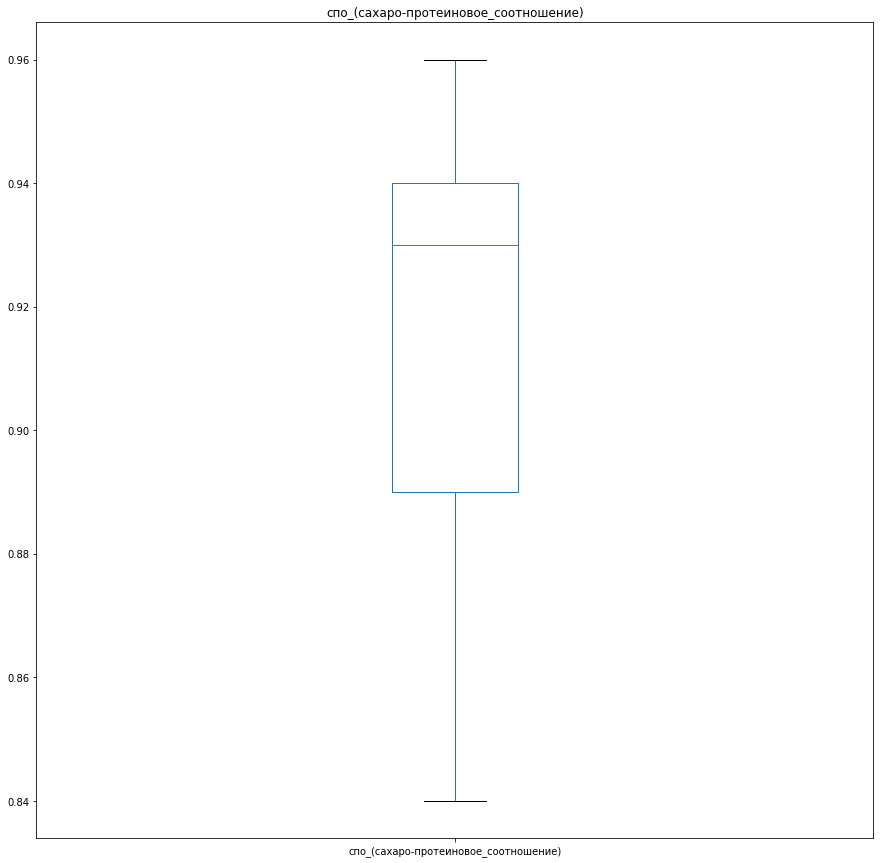

count    629.000000
mean       0.913116
std        0.032203
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо_(сахаро-протеиновое_соотношение), dtype: float64
count                629
unique                 2
top       Вис_Бик_Айдиал
freq                 373
Name: порода, dtype: object
count           629
unique            2
top       Холмистое
freq            351
Name: тип_пастбища, dtype: object
count        629
unique         2
top       Айдиал
freq         318
Name: порода_папы_быка, dtype: object


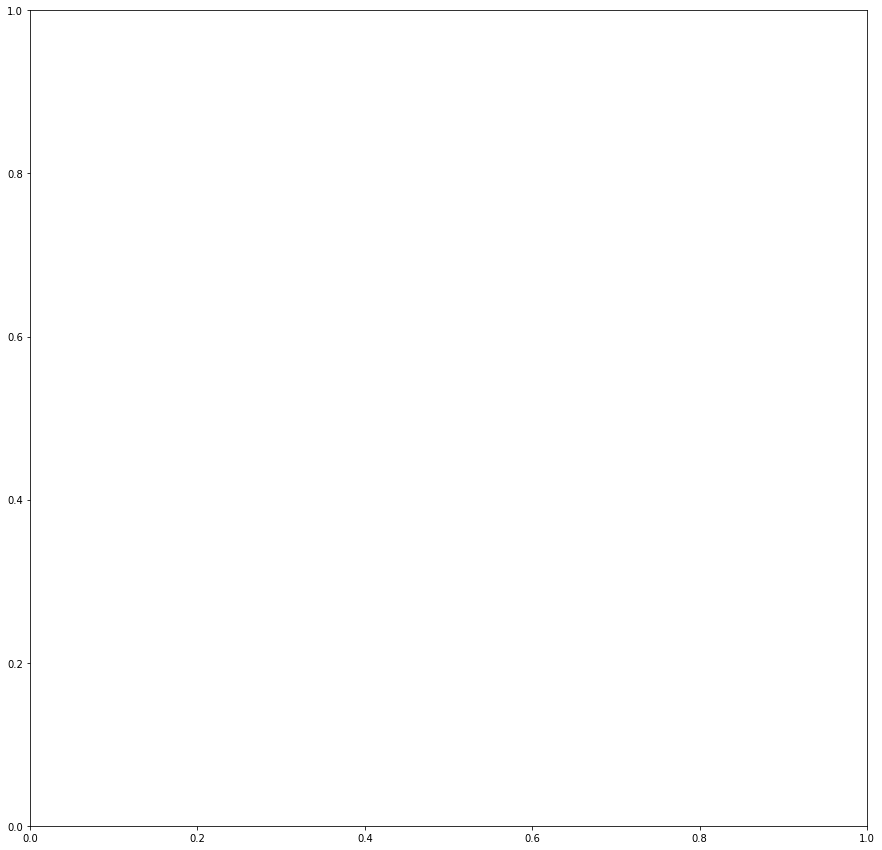

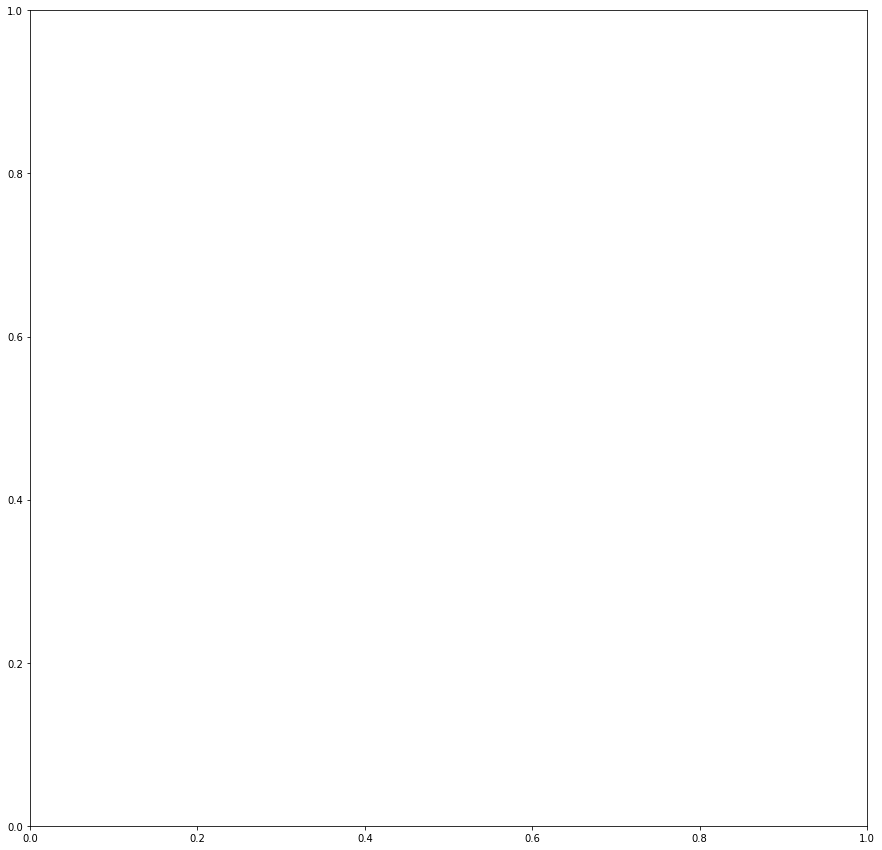

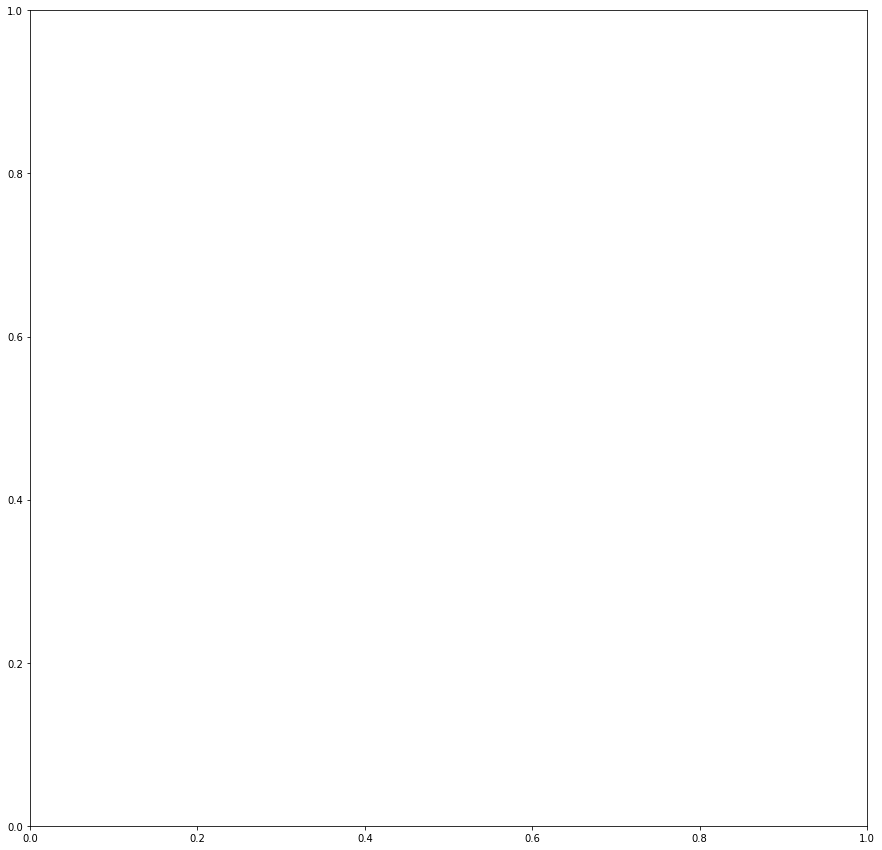

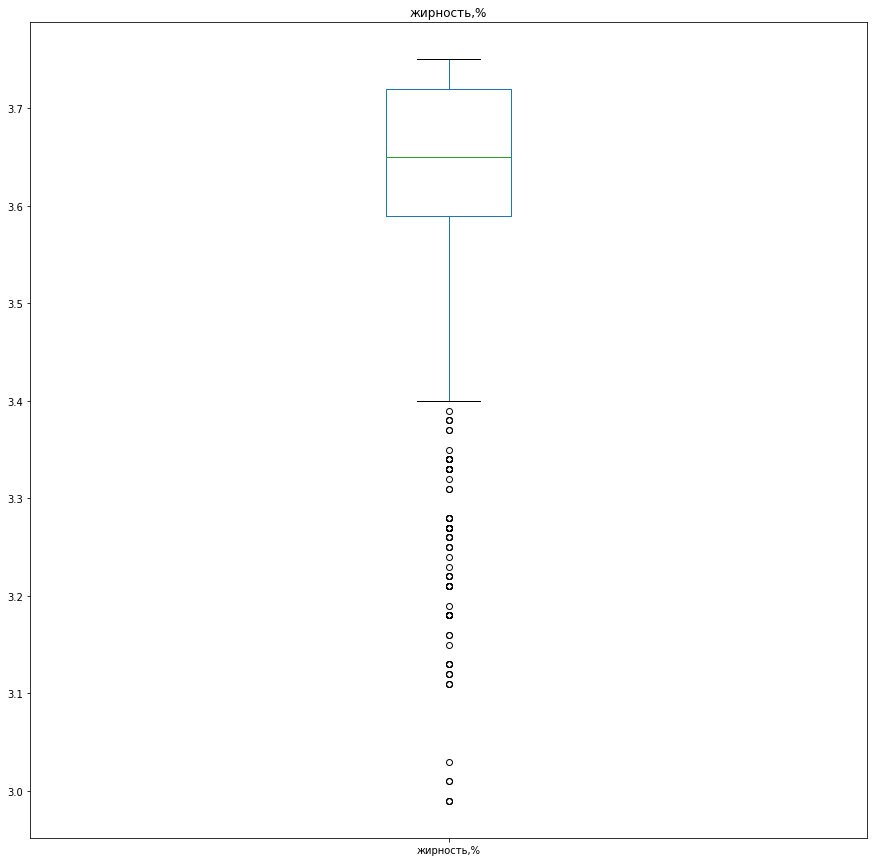

count    629.000000
mean       3.603657
std        0.168656
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность,%, dtype: float64


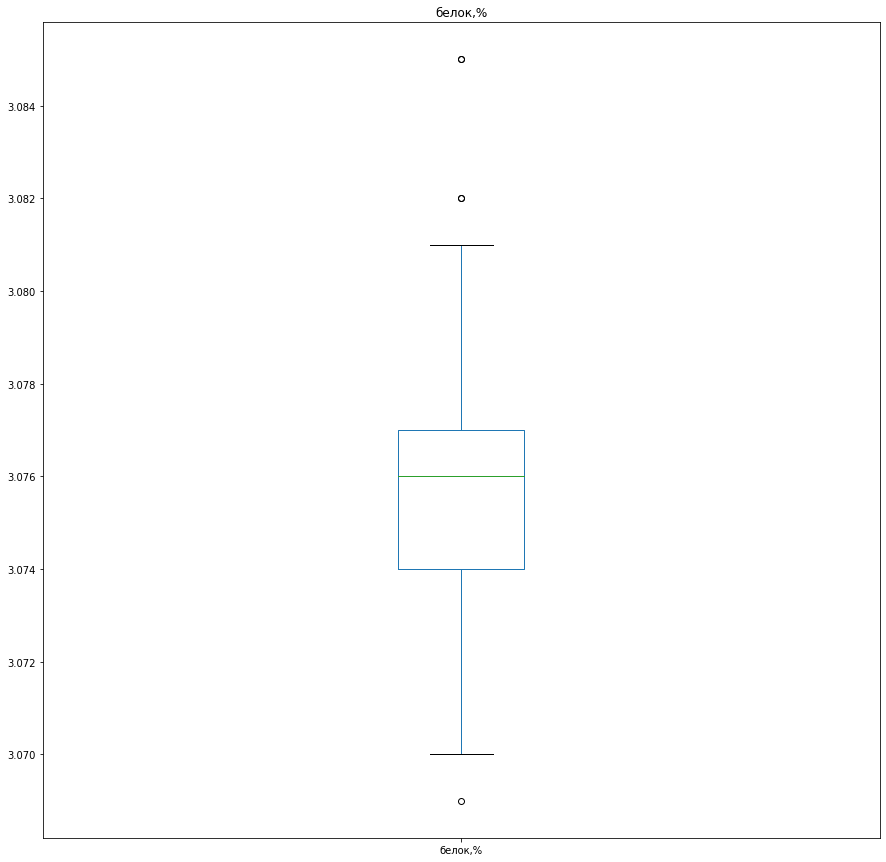

count    629.000000
mean       3.075671
std        0.002549
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок,%, dtype: float64
count        629
unique         2
top       вкусно
freq         371
Name: вкус_молока, dtype: object
count             629
unique              2
top       более_2_лет
freq              519
Name: возраст, dtype: object


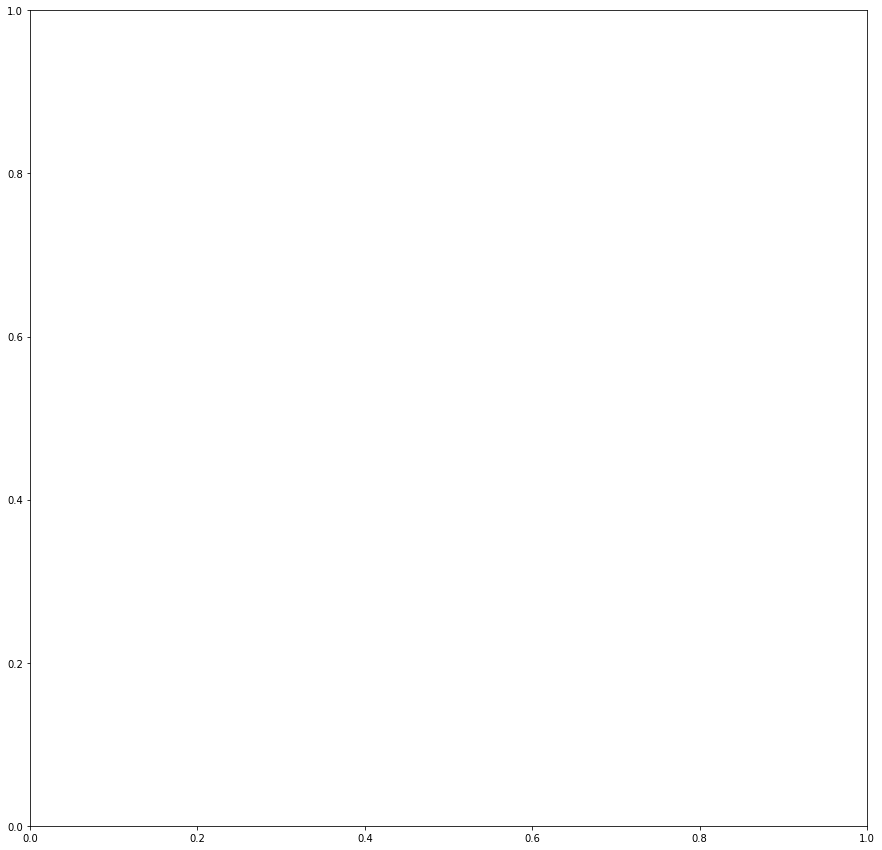

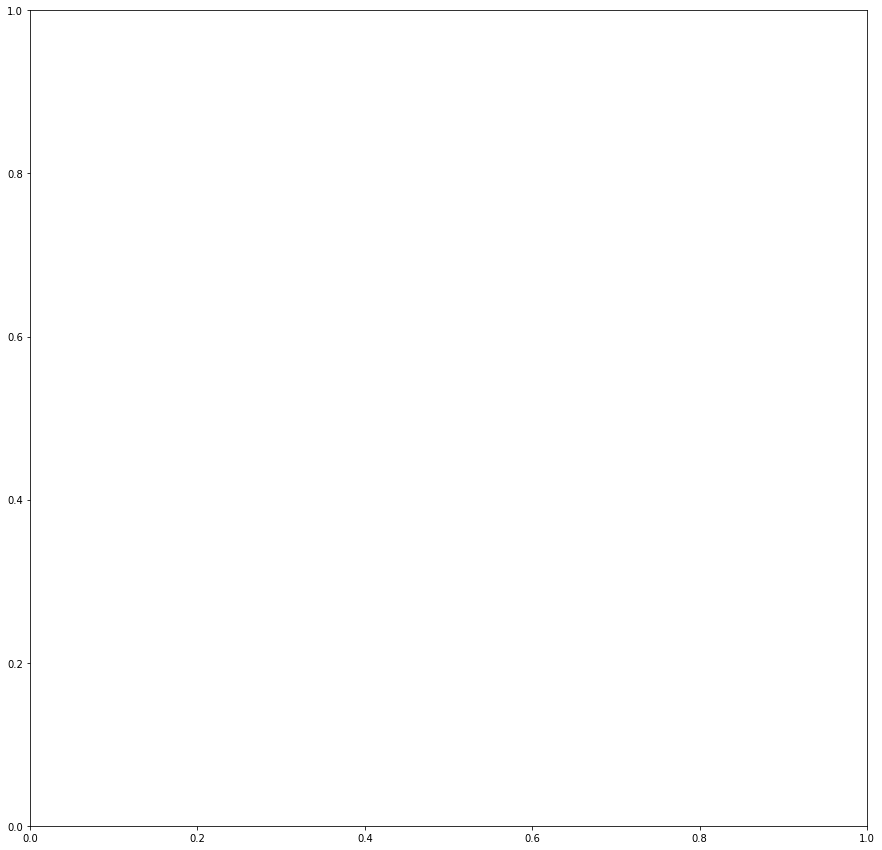

In [39]:
for n in data_main.columns:
    barplot_function(n)

count                   20
unique                   2
top       Рефлешн_Соверинг
freq                    11
Name: порода, dtype: object
count            20
unique            2
top       равнинное
freq             11
Name: тип_пастбища, dtype: object
count          20
unique          2
top       Соверин
freq           12
Name: порода_папы_быка, dtype: object
count         20
unique         4
top       Буйный
freq           8
Name: имя_папы, dtype: object


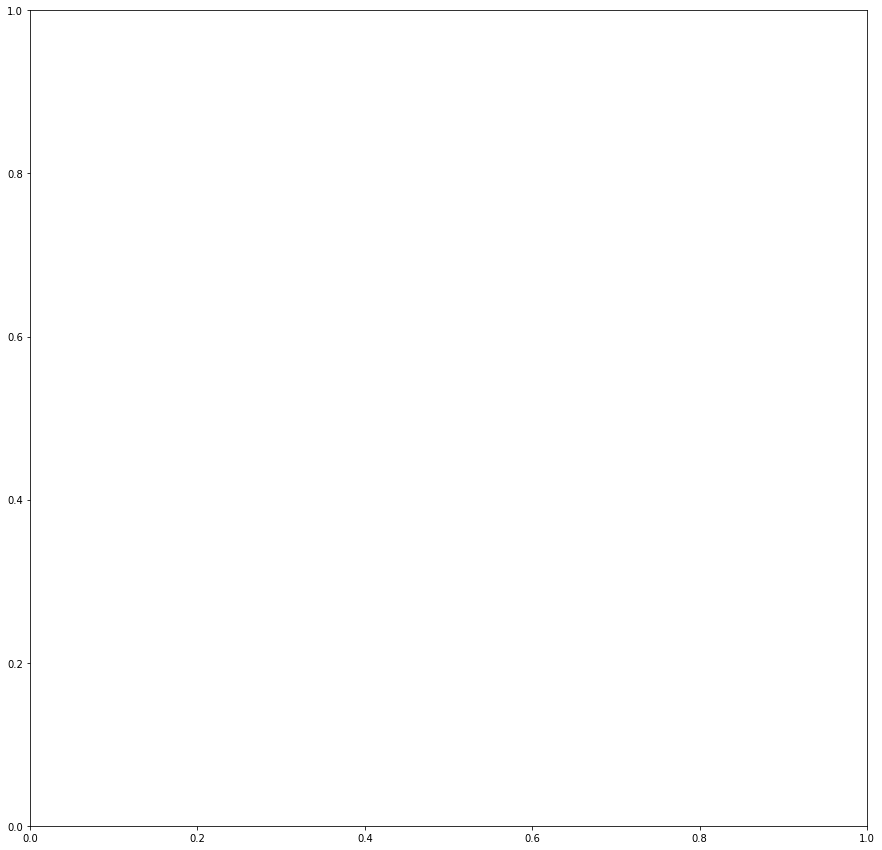

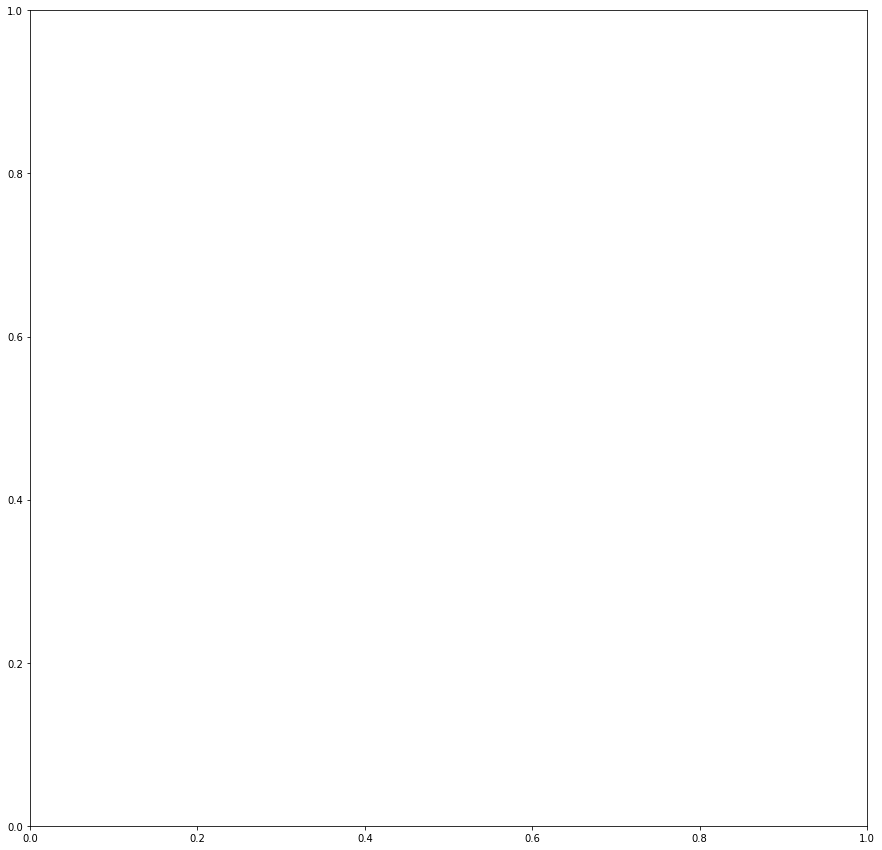

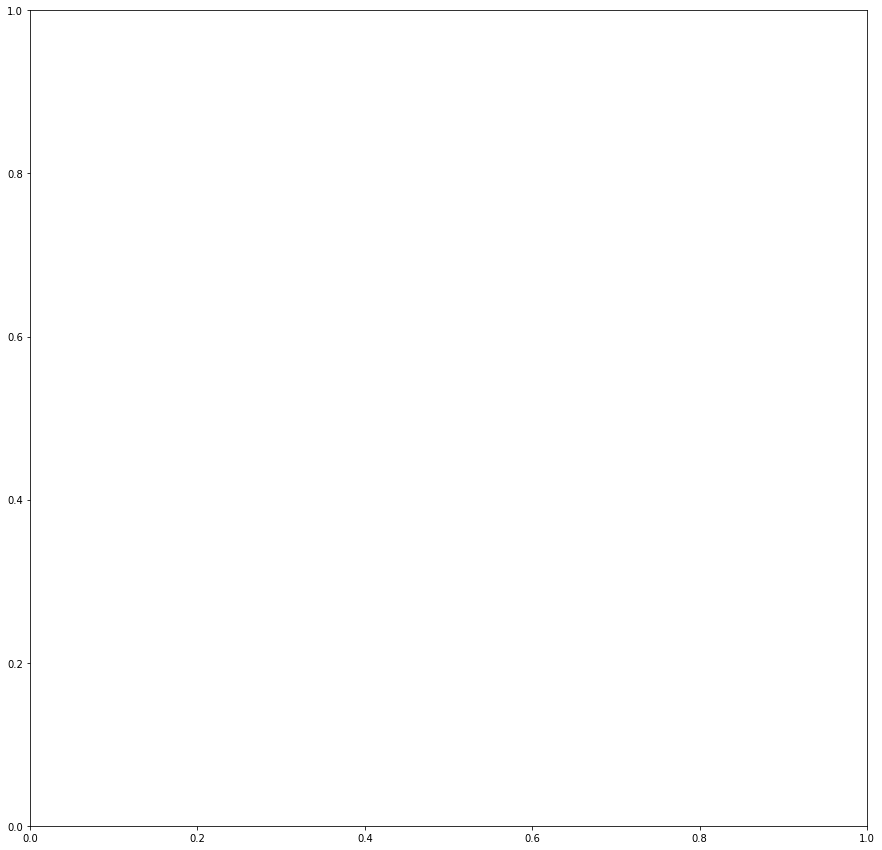

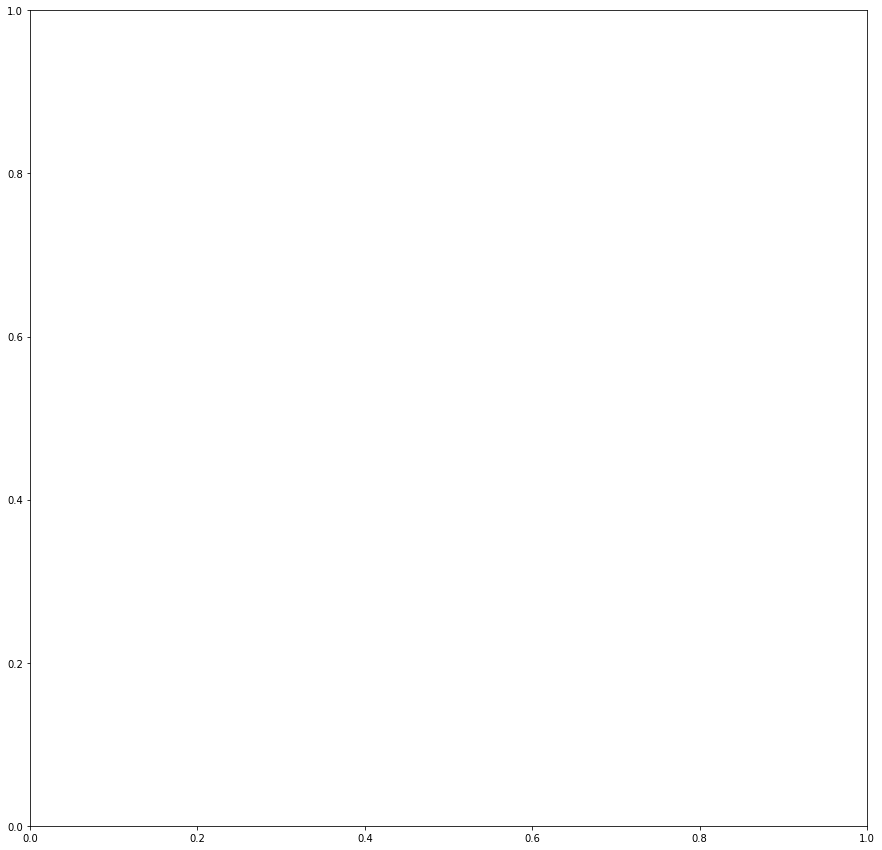

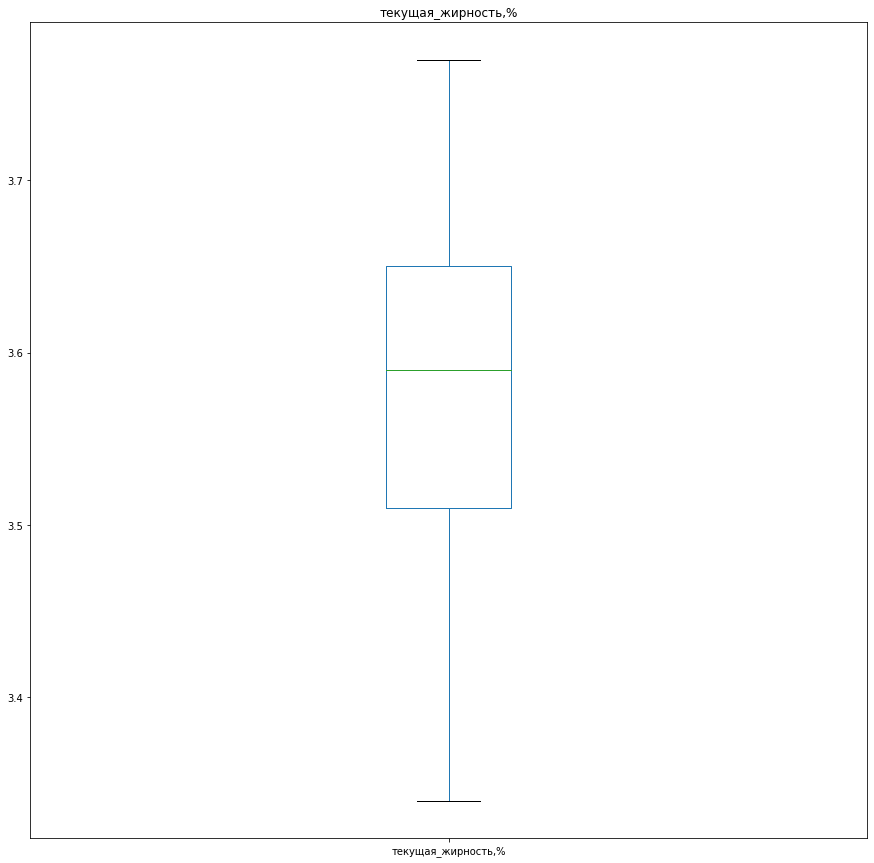

count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: текущая_жирность,%, dtype: float64


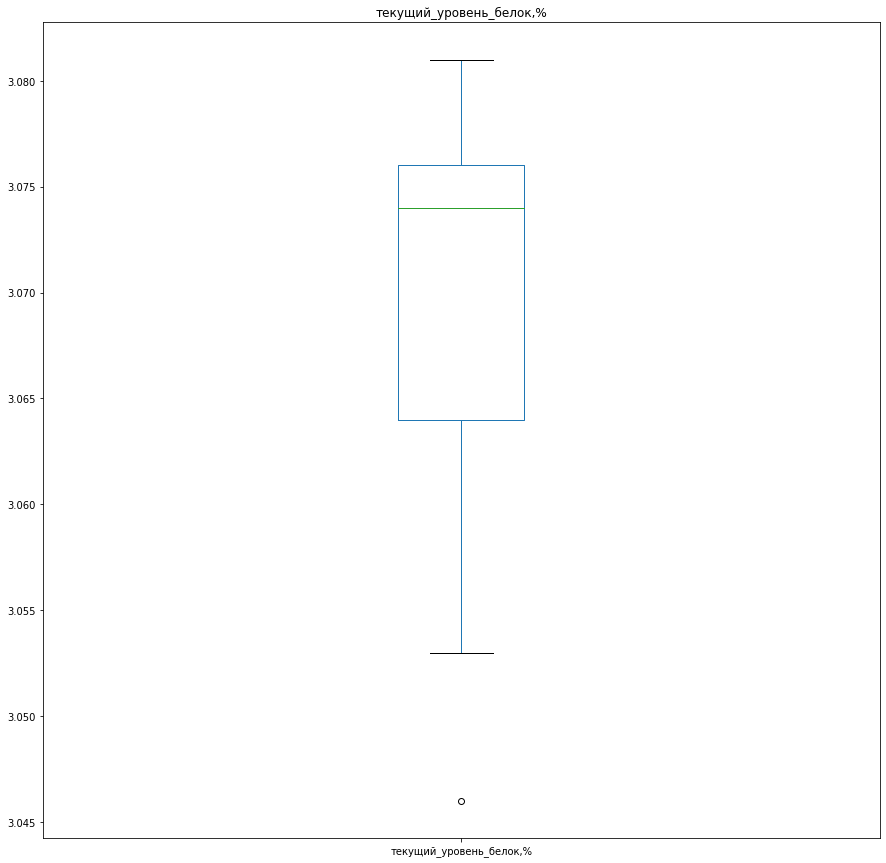

count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: текущий_уровень_белок,%, dtype: float64
count              20
unique              2
top       более_2_лет
freq               15
Name: возраст, dtype: object


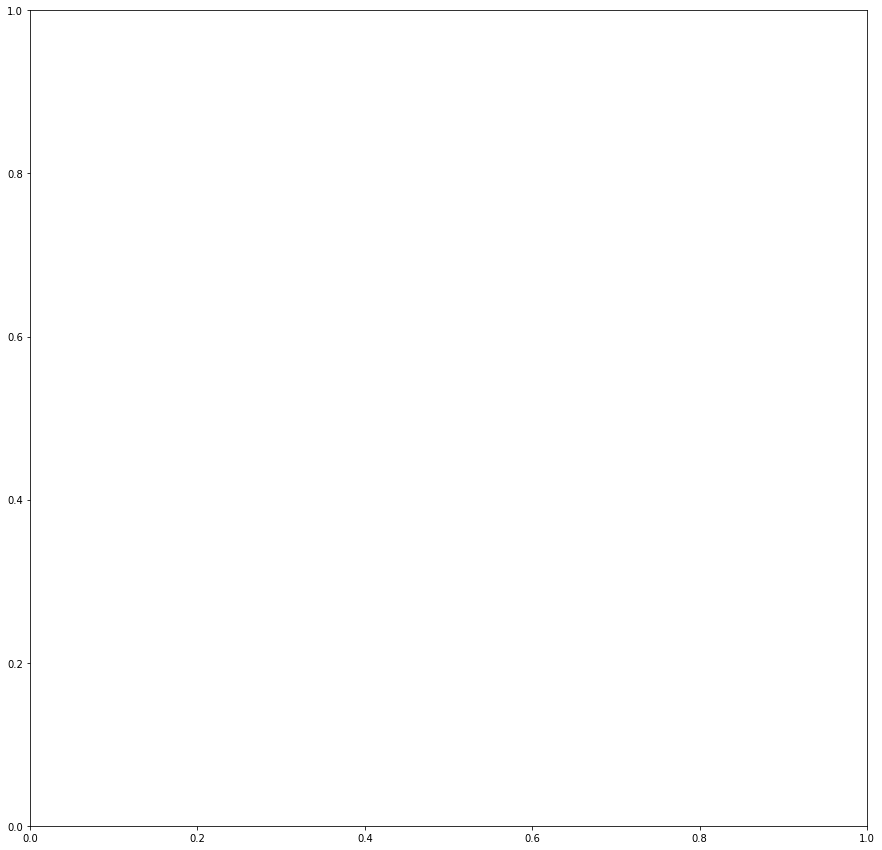

In [40]:
for n in data_cow.columns:
    barplot_function_1(n)

In [41]:
#data_main = data_main.loc[data_main['удой,_кг'] < 8000]

C:\Users\simuk\AppData\Local\Temp/ipykernel_8452/836808442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_main['удой,_кг'][data_main['удой,_кг'] == 45616] = data_main['удой,_кг'].median()
c:\Users\simuk\practicum\practicum_env\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


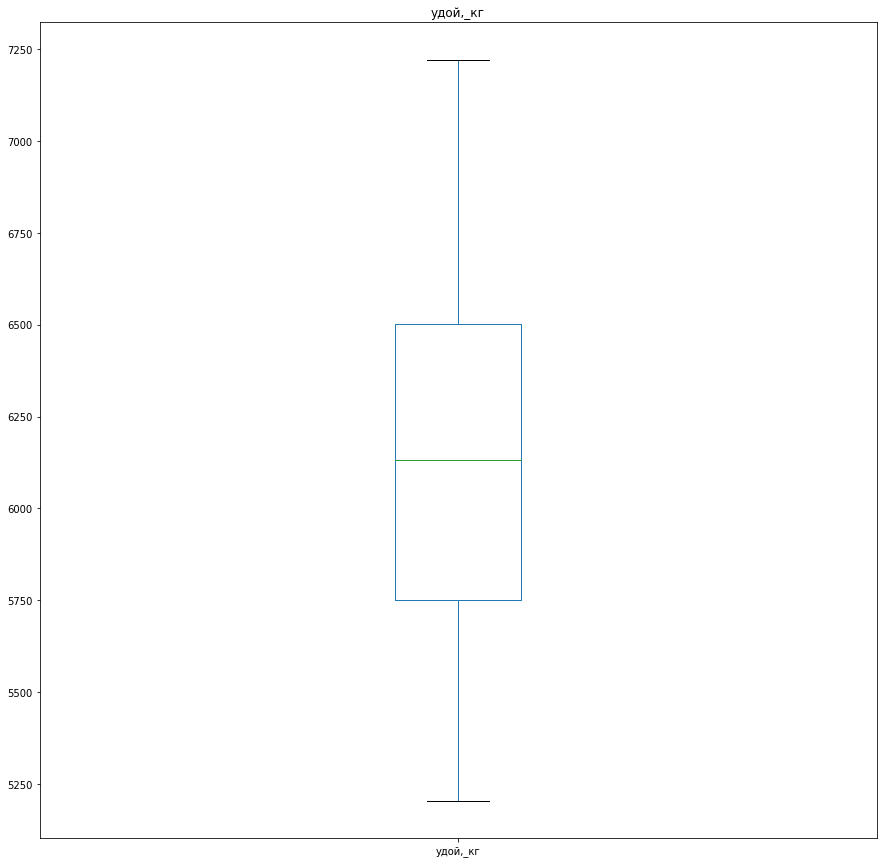

In [42]:
data_main['удой,_кг'][data_main['удой,_кг'] == 45616] = data_main['удой,_кг'].median()
plt.figure(figsize=(15, 15))
data_main[f'удой,_кг'].plot.box()
plt.title(f'удой,_кг')
plt.show()

In [43]:
data_main['удой,_кг'].describe()

count     629.000000
mean     6125.979332
std       475.478118
min      5204.000000
25%      5751.000000
50%      6133.000000
75%      6501.000000
max      7222.000000
Name: удой,_кг, dtype: float64

Аномальное значение было обнаружено в столбце 'удой,_кг'. Оно было заменено медианное значение. 

**Итоги предобработки данных:**
- Данные имели весьма хорошее качество
- Все названия колонок приведены к нижнему регистру и в них убраны пробелы
- В части столбцов вместо "." стояла ",", что вызывало ошибку, когда те колонки, где тип данных должен быть float, был object. Все столбці привеені к корректнім типам данных. 
- В датафрейме data_main и data_cow были обнаружены явные дубликаты, которые могли быть вызваны технической ошибкой.
- В датафрейме data_main в столбцах "тип_пастбища" и "имя_папы_быка" были обнаружены неявные дубликаты, которые могли возникнуть из-за ошибки ручного заполнения.
- В датафрейме data_main в столбце "удой, кг%" было обнаружено аномальное значение 45616 кг. Это невозможно, поэтому данное знаечние было заменено на медианное. 

# Исследовательский анализ данных 

data_mai

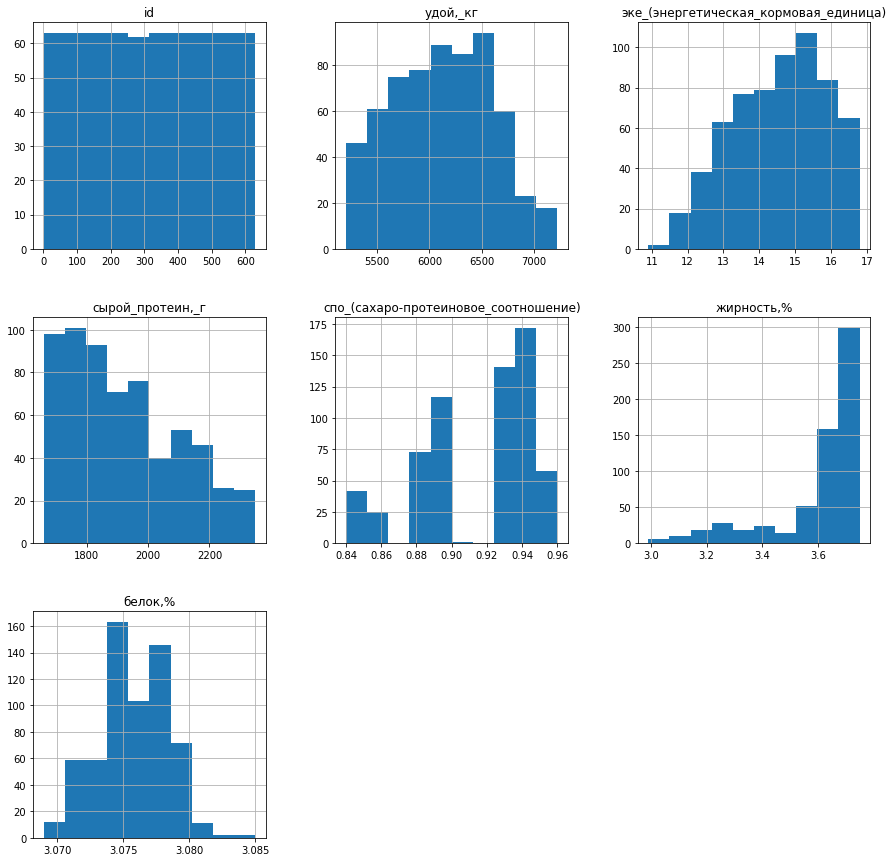

In [44]:
data_main.hist(figsize=(15, 15));

- Из данных графиков понятно? что коров с удоем более 7000 кг значительно меньше, чем остальных. 
- Содержание ЭКЕ больше всего в районе 15, затем уменьшается в обе стороны.
- Содержание сырого протеина больше всего от 1600 до 1800 г, далее уменьшается. 
- Чаще всего молоко коровы дают жирнее 3.6% и с содержанием белка около 3.075 - 3.08%

In [45]:
data_main.head()

,id,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис_Бик_Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис_Бик_Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,Рефлешн_Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,Рефлешн_Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис_Бик_Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [46]:
data_main_count = data_main.loc[:, ['удой,_кг','эке_(энергетическая_кормовая_единица)','сырой_протеин,_г','спо_(сахаро-протеиновое_соотношение)', 'жирность,%', 'белок,%']]
data_main_object = data_main.loc[:, ['порода','тип_пастбища','порода_папы_быка','вкус_молока','возраст']]

In [47]:

def pirog(name):
    breed_counts = data_main_object[f'{name}'].value_counts()
    plt.pie(breed_counts, labels=breed_counts.index, autopct='%1.1f%%', startangle=140)

    plt.title(f'Круговая диаграмма распределения для показателя {name}')


    plt.show()

In [48]:
def histagramma(name):
    counts = data_main_count[f'{name}']
    plt.hist(counts, bins=30, edgecolor='black', alpha=0.7)
    plt.axvline(np.median(counts), color='red', linestyle='dashed', linewidth=2, label='Медиана')
    plt.axvline(np.mean(counts), color='green', linestyle='dashed', linewidth=2, label='Среднее')
    plt.axvline(np.percentile(counts, 25), color='orange', linestyle='dashed', linewidth=2, label='1-й квартиль')
    plt.axvline(np.percentile(counts, 75), color='blue', linestyle='dashed', linewidth=2, label='3-й квартиль')
        
    plt.legend()

    plt.title(f'{name}')
    plt.xlabel(f'Значения')
    plt.ylabel('Частота')
    plt.show()
    

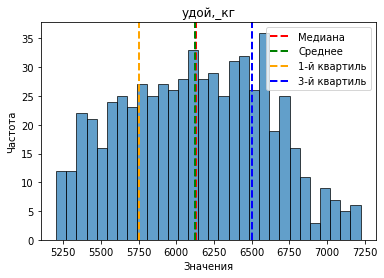

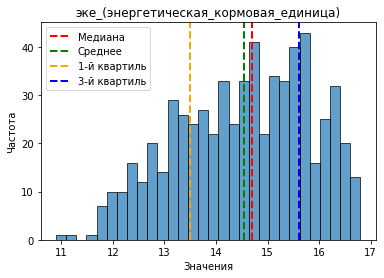

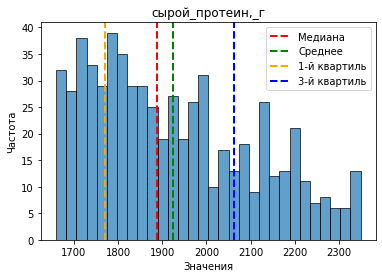

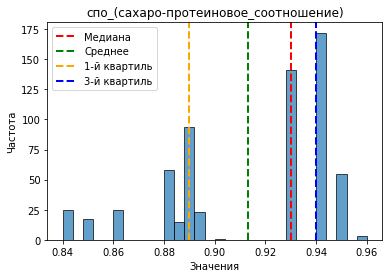

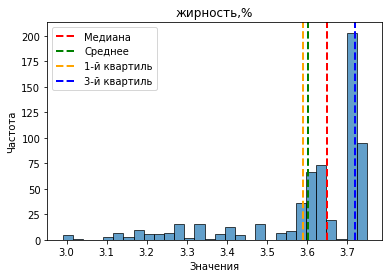

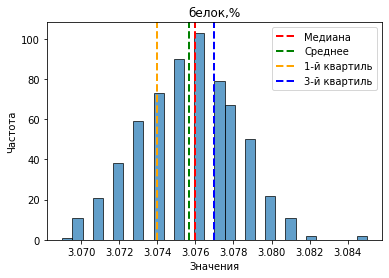

In [49]:
for n in data_main_count:
    histagramma(n)

In [50]:
data_cow.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис_Бик_Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис_Бик_Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,Рефлешн_Соверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,Рефлешн_Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,Рефлешн_Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [51]:
data_cow_object = data_cow.loc[:, ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'возраст']]
data_cow_count = data_cow.loc[:, ['текущая_жирность,%', 'текущий_уровень_белок,%']]

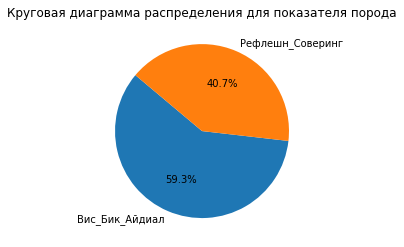

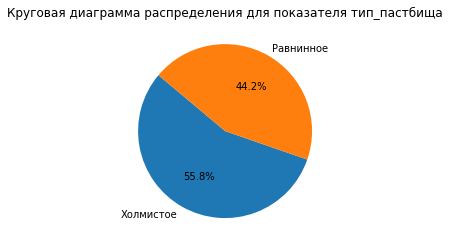

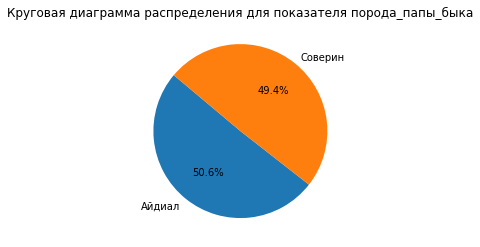

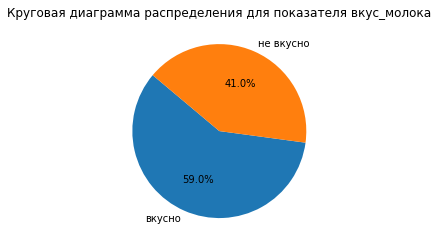

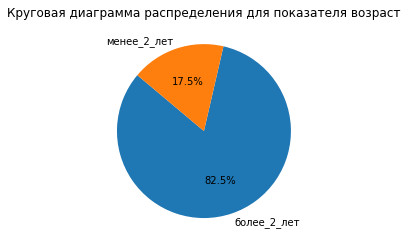

In [52]:
for n in data_main_object.columns:
    pirog(n)

- Гипотеза 0 - Белок.% имеет нормальное рапсределение.
- Гипотеза 1 - Бело.% не имеет нормального рапсределения

In [53]:
stat, p_value = shapiro(data_main['белок,%'])

print(f"Статистика теста: {stat}")
print(f"P-value: {p_value}")
alpha = 0.5 
if p_value > alpha:
    print("Нет оснований отклонить гипотезу о нормальности данных")
else:
    print("Гипотеза о нормальности данных отклонена")

Статистика теста: 0.9831634759902954
P-value: 1.2114685432607075e-06
Гипотеза о нормальности данных отклонена


**Выводы из исследования:**
- На ферме коров Вис бик айбл 59,2%, а РефлешнСоверинг 40.8%
- 55.7% коров пасуться на холмистом пастбище, а 44.3% на равнинном. 
- 58.9% коров имеют вкусное молоко. У 41.1% оно не вкусное. Данный показатель является целевым. На его основе можно выявить закономерности, чтобы узнать, в чём секрет вкусного молока.
- 82.5% коров старше 2 лет. 17.5% моложе 2 лет. 
- Большая часть коров даёт удой от 5750 кг до 6500 кг. Есть небольшая группа коров, дающая удой в районе 7000 и выше. Данный показатель один из целевых. 
- Большая часть корма содержит ЭКЕ равное от 12 до 17 единиц. Однако есть несколько коров, получавших корм с ЭКЕ = около 11 единиц. На графике они выглядят, как выброс. 
- Содержание сырого протеина в корме не примерно рапсределено с постпенным убыванием от 1600 до 2300 г. 
- СПО в корме имеет несколько пиков в районе 0,86, 0,87, 0.89, 0,93 - 0,96. 
- Жирность молока примерно равно 3-4%. Имеет пик в районе 3,6 и 3,7 %.
- Содержание белка  наибольшее в районе 3,076 %, меньшее и большее содержание постепенно уменьшается. Имеется небольшой выброс в районе 0,84 %. 

In [54]:
def histagramma_cow(name):
    counts = data_cow_count[f'{name}']
    plt.hist(counts, bins=30, edgecolor='black', alpha=0.7)
    plt.axvline(np.median(counts), color='red', linestyle='dashed', linewidth=2, label='Медиана')
    plt.axvline(np.mean(counts), color='green', linestyle='dashed', linewidth=2, label='Среднее')
    plt.axvline(np.percentile(counts, 25), color='orange', linestyle='dashed', linewidth=2, label='1-й квартиль')
    plt.axvline(np.percentile(counts, 75), color='blue', linestyle='dashed', linewidth=2, label='3-й квартиль')
        
    plt.legend()

    plt.title(f'{name}')
    plt.xlabel(f'Значения')
    plt.ylabel('Частота')
    plt.show()


In [55]:

def pirog_cow(name):
    breed_counts = data_cow_object[f'{name}'].value_counts()
    plt.pie(breed_counts, labels=breed_counts.index, autopct='%1.1f%%', startangle=140)

    plt.title(f'Круговая диаграмма распределения для показателя {name}')


    plt.show()

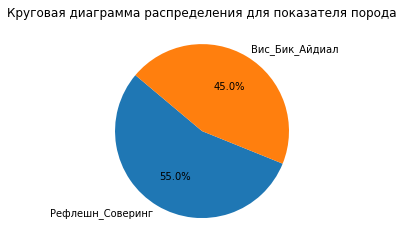

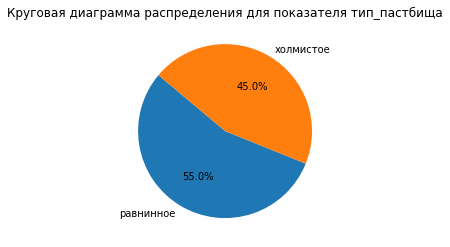

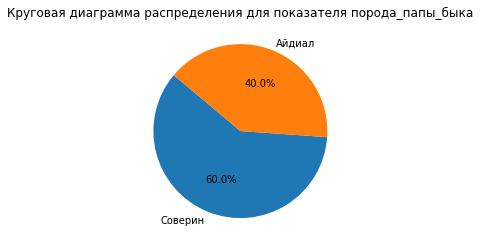

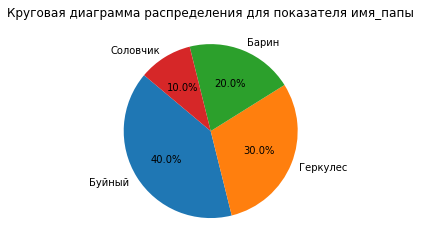

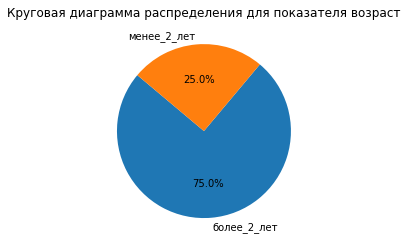

In [56]:
for m in data_cow_object:
    pirog_cow(m)

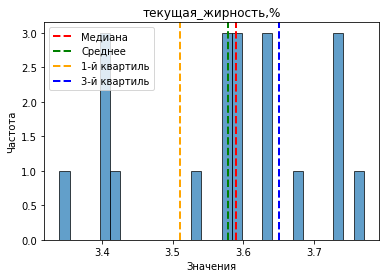

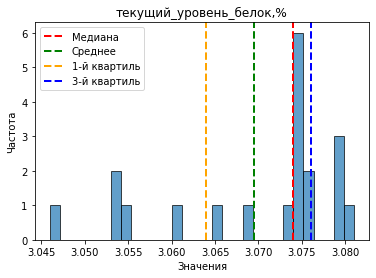

In [57]:
for n in data_cow_count:
    histagramma_cow(n)

**Выводы из анализа**
- Предложение продовцы равно между по породам. Половина Вис Бик Айдиалов и половина РефлешнСоверинг. 
- Коровы одинаково часто паслись на холмистых пастбищах и на равнинных. 
- 62,5% имеют папу породу Соверин, а 37,5% Айдиал.
- 68.8% старше 2 лет, 31.2% моложе 2 лет

- Основной показатель для дльнейшей работы будет удой,кг. 
Данные можно улучшить следующим образом: Отсеить лишние, которіе не влияют на удой, убрать малозначимые данные, привести их к одному масштабу. 

## Корреляционный анализ данных

В данном анализе нужно выявить корреляцию между целевыми признаками (удой и вкус молока) и 

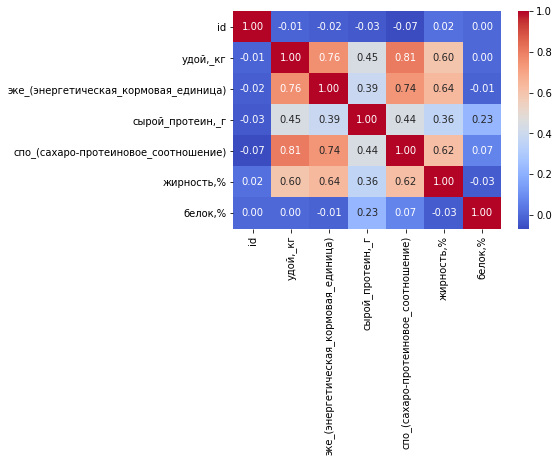

In [58]:
correlation_matrix = data_main.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Значительная корреляция между удоем найдена у ЭКЕ в корме и СПО. Количество сырого протеина влияет меньше. Так как количество сырого протеина и СПО взаимосвязаны целесообразнее оставить только одну метрику. 

In [59]:
data_main.head()

,id,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис_Бик_Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис_Бик_Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,Рефлешн_Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,Рефлешн_Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис_Бик_Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [60]:
data_cow_object.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,возраст
0,Вис_Бик_Айдиал,холмистое,Айдиал,Геркулес,более_2_лет
1,Вис_Бик_Айдиал,равнинное,Соверин,Буйный,менее_2_лет
2,Рефлешн_Соверинг,равнинное,Соверин,Барин,более_2_лет
3,Рефлешн_Соверинг,холмистое,Айдиал,Буйный,более_2_лет
4,Рефлешн_Соверинг,равнинное,Айдиал,Буйный,более_2_лет


In [61]:
def corrr(two):
    #sns.scatterplot(x='удой,_кг', y=f'{one}', hue=f'{two}', data=data_main)
    sns.pairplot(data_main, x_vars=data_main_count.columns, y_vars='удой,_кг', hue = f'{two}')
    plt.xlabel('Удой, кг')
    plt.ylabel(f'one')
    plt.title(f'Диаграмма рассеяния для "Удой,кг" с учетом {two}')
    plt.legend(title=f'{two}')
    plt.show()

No handles with labels found to put in legend.


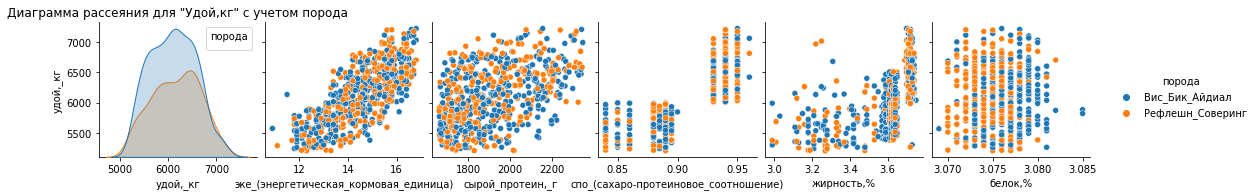

No handles with labels found to put in legend.


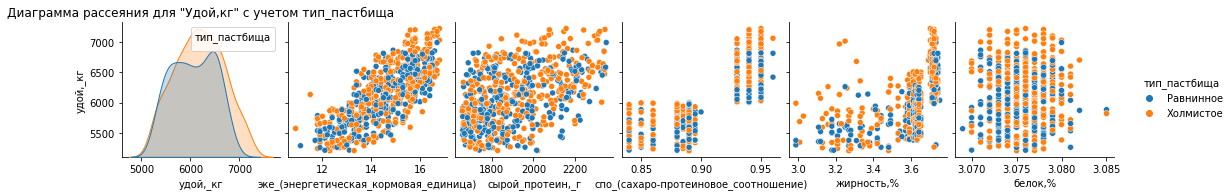

No handles with labels found to put in legend.


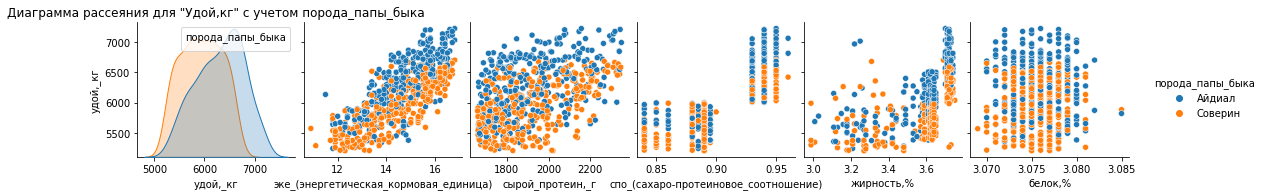

No handles with labels found to put in legend.


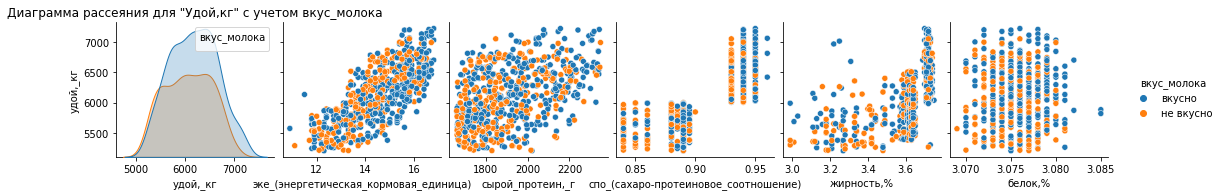

No handles with labels found to put in legend.


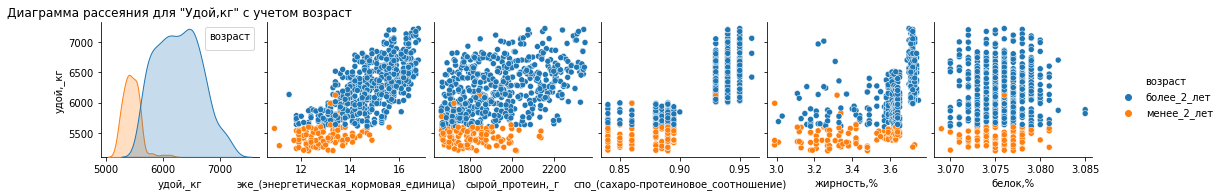

In [62]:
for n in data_main_object.columns:
    corrr(n)

In [63]:
dropik = data_main.drop('сырой_протеин,_г', axis =1)

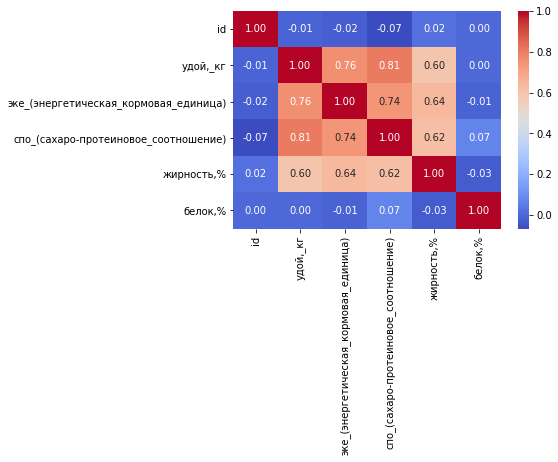

In [64]:
correlation_matrix = dropik.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

**Выводы**
1. ЭКЕ корма - чем больше ЭКЕ, тем больше удой
2. СПО корма - чем больше СПО, тем больше удой
3. Порода папы быка - У сыновей отцов породы Айдиал удой больше
4. У коров породы Вис Бик Айдиал содержание белка в молоке больше, чем у папы породы РефлешнСовергин
5. Коровы старше 2 лет имеют больший удой, чем у тех, кто моложе 2 лет. 
6. У коров, у которых отец пороы Айдиал молоко жирнее, чем у породы РефлешнСовергин
7. Мультиколлинеарность есть между признаками "СПО" и "сырой протеин". 

# Задача Регрессии

Для работы модели регрессии будут отброшенны признаки: жирность,%, белок,% и вкус_молока, потому что они характеризуют молоко, а не целевой признак "удой"

**Модель 1**

In [65]:
data_main.head()

,id,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис_Бик_Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис_Бик_Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,Рефлешн_Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,Рефлешн_Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис_Бик_Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [66]:
data_regresion = data_main.drop(['id','жирность,%', 'белок,%', 'вкус_молока'], axis=1)

In [67]:
X = data_regresion.drop('удой,_кг' , axis=1)
y = data_regresion['удой,_кг']

In [68]:
def tts(x, y):
    RANDOM_STATE = 42
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)
    return X_train, X_test, y_train, y_test
    

In [69]:
X_train, X_test, y_train, y_test = tts(X, y)

In [70]:
X_train.head()

,эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,возраст
612,14.6,1967,0.94,Вис_Бик_Айдиал,Равнинное,Айдиал,более_2_лет
587,14.7,1671,0.88,Вис_Бик_Айдиал,Равнинное,Айдиал,более_2_лет
196,14.6,2125,0.93,Вис_Бик_Айдиал,Холмистое,Айдиал,более_2_лет
328,13.1,2077,0.89,Вис_Бик_Айдиал,Равнинное,Айдиал,более_2_лет
259,15.3,1801,0.93,Рефлешн_Соверинг,Холмистое,Айдиал,более_2_лет


In [71]:
cut_call_name = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
cut_scall_name = ['эке_(энергетическая_кормовая_единица)', 'спо_(сахаро-протеиновое_соотношение)', 'сырой_протеин,_г']

In [72]:
def encoder_for(x, y):
    encoder  = OneHotEncoder(sparse=False)
    X_train_ohn = encoder.fit_transform(x[cut_call_name])
    X_test_ohn = encoder.transform(y[cut_call_name])
    encoder_col_names = encoder.get_feature_names()
    X_train_ohn = pd.DataFrame(X_train_ohn, columns=encoder_col_names)
    X_test_ohn = pd.DataFrame(X_test_ohn, columns=encoder_col_names)
    return X_train_ohn, X_test_ohn



In [73]:
X_train_ohn, X_test_ohn = encoder_for(X_train, X_test)

In [74]:
def scaler_for(x, y):   
    scaler = StandardScaler()
    X_train_scall = scaler.fit_transform(x[cut_scall_name])
    X_test_scall = scaler.transform(y[cut_scall_name])
    X_train_scall = pd.DataFrame(X_train_scall, columns=cut_scall_name)
    X_test_scall = pd.DataFrame(X_test_scall, columns=cut_scall_name)
    return X_train_scall, X_test_scall


In [75]:
X_train_scall, X_test_scall = scaler_for(X_train, X_test)

In [76]:
X_train = pd.concat([X_train_ohn, X_train_scall], axis=1)
X_test = pd.concat([X_test_ohn, X_test_scall], axis=1)

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   x0_Вис_Бик_Айдиал                      471 non-null    float64
 1   x0_Рефлешн_Соверинг                    471 non-null    float64
 2   x1_Равнинное                           471 non-null    float64
 3   x1_Холмистое                           471 non-null    float64
 4   x2_Айдиал                              471 non-null    float64
 5   x2_Соверин                             471 non-null    float64
 6   x3_более_2_лет                         471 non-null    float64
 7   x3_менее_2_лет                         471 non-null    float64
 8   эке_(энергетическая_кормовая_единица)  471 non-null    float64
 9   спо_(сахаро-протеиновое_соотношение)   471 non-null    float64
 10  сырой_протеин,_г                       471 non-null    float64
dtypes: flo

In [78]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)
print(predictions[:1])

[5248.]


In [79]:
def metrix(x, y):
   r2 = r2_score(x, y)
   mae = mean_absolute_error(x, y)
   mse = mean_squared_error(x, y)
   rmse = mean_squared_error(x, y, squared=False)
   print(f'R2 = {r2}')
   print(f'MAE = {mae}')
   print(f'MSE = {mse}')
   print(f'RMSE = {rmse}')


In [80]:
metrix(y_test, predictions)

R2 = 0.8214060419324506
MAE = 179.60759493670886
MSE = 48937.56962025316
RMSE = 221.2183754127427


In [81]:
residuals = y_test - predictions


In [82]:
def ostatok(x, y):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


    ax1.hist(x, bins=20, color='blue', alpha=0.7)
    ax1.set_xlabel('Остатки')
    ax1.set_ylabel('Частота')
    ax1.set_title('Гистограмма')
    mean_value = np.mean(x)
    ax1.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_value}')

    median_value = np.median(x)
    ax1.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Медиана: {median_value}')

    ax1.legend()

    ax2.scatter(x, y, color='red', marker='o')
    ax2.set_xlabel('Значения X')
    ax2.set_ylabel('Значения Y')
    ax2.set_title('Диаграмма рассеивания')

    plt.tight_layout()

    plt.show()

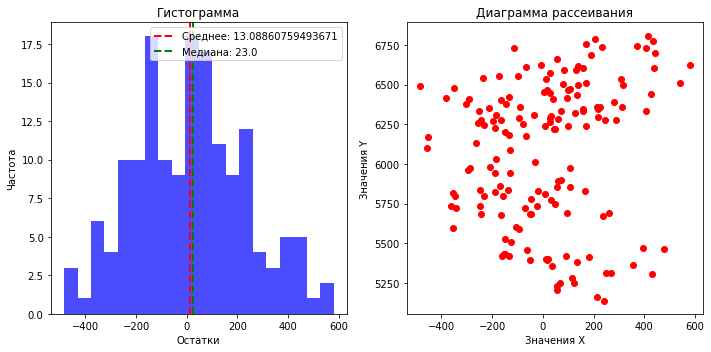

In [83]:
ostatok(residuals, predictions)

1. На гистограмме линия среднего немного смещена влево (+13). 
2. Чередование низкой и высокой дисперсии остатков
3. R2 = 0.8214060419324506
4. MAE = 179.60759493670886
5. MSE = 48937.56962025316
6. RMSE = 221.2183754127427

**Вывод:**
- Можно улучшить модель

**Модель 2**

In [84]:
data_regresion['спо_бинарный'] = (data_regresion['спо_(сахаро-протеиновое_соотношение)'] >0.91).astype(int)
data_regresion['эке_в_квадрате'] = data_regresion['эке_(энергетическая_кормовая_единица)']**2
data_regresion.drop(['эке_(энергетическая_кормовая_единица)', 'спо_(сахаро-протеиновое_соотношение)'], axis=1)

,"удой,_кг","сырой_протеин,_г",порода,тип_пастбища,порода_папы_быка,возраст,спо_бинарный,эке_в_квадрате
0,5863,1743,Вис_Бик_Айдиал,Равнинное,Айдиал,более_2_лет,0,201.64
1,5529,2138,Вис_Бик_Айдиал,Равнинное,Соверин,менее_2_лет,0,163.84
2,5810,1854,Рефлешн_Соверинг,Холмистое,Соверин,более_2_лет,0,196.00
3,5895,2012,Рефлешн_Соверинг,Холмистое,Айдиал,более_2_лет,0,153.76
4,5302,1675,Вис_Бик_Айдиал,Равнинное,Соверин,менее_2_лет,0,163.84
...,...,...,...,...,...,...,...,...
624,6812,1964,Рефлешн_Соверинг,Равнинное,Айдиал,более_2_лет,1,237.16
625,5513,1700,Рефлешн_Соверинг,Равнинное,Соверин,менее_2_лет,0,166.41
626,5970,1837,Рефлешн_Соверинг,Холмистое,Соверин,более_2_лет,0,207.36
627,5746,1994,Рефлешн_Соверинг,Равнинное,Соверин,более_2_лет,0,190.44


In [85]:
data_regresion.head()

,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,возраст,спо_бинарный,эке_в_квадрате
0,5863,14.2,1743,0.890,Вис_Бик_Айдиал,Равнинное,Айдиал,более_2_лет,0,201.64
1,5529,12.8,2138,0.890,Вис_Бик_Айдиал,Равнинное,Соверин,менее_2_лет,0,163.84
2,5810,14.0,1854,0.885,Рефлешн_Соверинг,Холмистое,Соверин,более_2_лет,0,196.00
3,5895,12.4,2012,0.885,Рефлешн_Соверинг,Холмистое,Айдиал,более_2_лет,0,153.76
4,5302,12.8,1675,0.885,Вис_Бик_Айдиал,Равнинное,Соверин,менее_2_лет,0,163.84


In [86]:
cut_call_name = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст']
cut_scall_name = ['эке_(энергетическая_кормовая_единица)', 'спо_(сахаро-протеиновое_соотношение)', 'сырой_протеин,_г', 'спо_бинарный', 'эке_в_квадрате']

In [87]:
X = data_regresion.drop('удой,_кг' , axis=1)
y = data_regresion['удой,_кг']

In [88]:
X_train, X_test, y_train, y_test = tts(X, y)

In [89]:
X_train_ohn, X_test_ohn = encoder_for(X_train, X_test)

In [90]:
X_train_scall, X_test_scall = scaler_for(X_train, X_test)

In [91]:
X_train = pd.concat([X_train_ohn, X_train_scall], axis=1)
X_test = pd.concat([X_test_ohn, X_test_scall], axis=1)

In [92]:
model_lr_1 = LinearRegression()
model_lr_1.fit(X_train, y_train)
predictions = model_lr_1.predict(X_test)
print(predictions[:1])

[5360.]


In [93]:
residuals = y_test - predictions

In [94]:
metrix(y_test, predictions)

R2 = 0.8555837786541298
MAE = 157.39240506329114
MSE = 39572.329113924054
RMSE = 198.92794955441545


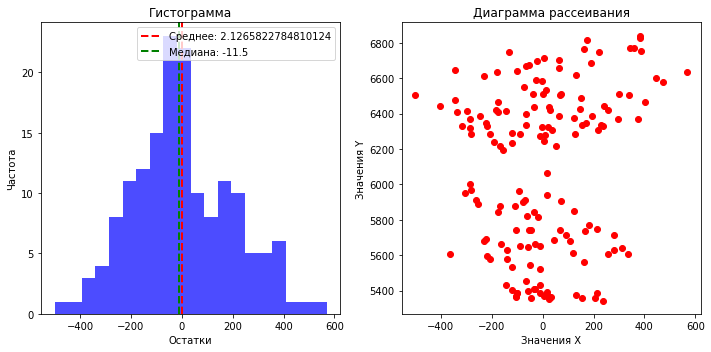

In [95]:
ostatok(residuals, predictions)

**выводы о модели 2**
1. Качество модели возрасло с 0.82 до 0.85
2. Смещение влево уменьшилось почти достигнув нуля (2)
3. Модель 2 работает лучше модели 1. 
4. R2 = 0.8555837786541298
5. MAE = 157.39240506329114
6. MSE = 39572.329113924054
7. RMSE = 198.92794955441545

**Модель 3**

In [96]:
data_regresion = pd.merge(data_main, dad, on='id', how='left')
data_regresion['спо_бинарный'] = (data_regresion['спо_(сахаро-протеиновое_соотношение)'] >0.91).astype(int)
data_regresion['эке_в_квадрате'] = data_regresion['эке_(энергетическая_кормовая_единица)']**2
data_regresion.drop(['эке_(энергетическая_кормовая_единица)', 'спо_(сахаро-протеиновое_соотношение)'], axis=1)

,id,"удой,_кг","сырой_протеин,_г",порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст,имя_папы,спо_бинарный,эке_в_квадрате
0,1,5863,1743,Вис_Бик_Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный,0,201.64
1,2,5529,2138,Вис_Бик_Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик,0,163.84
2,3,5810,1854,Рефлешн_Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин,0,196.00
3,4,5895,2012,Рефлешн_Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный,0,153.76
4,5,5302,1675,Вис_Бик_Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин,0,163.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,1964,Рефлешн_Соверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,Буйный,1,237.16
625,626,5513,1700,Рефлешн_Соверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,Барин,0,166.41
626,627,5970,1837,Рефлешн_Соверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,Барин,0,207.36
627,628,5746,1994,Рефлешн_Соверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,Барин,0,190.44


In [97]:
data_regresion.head()

,id,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст,имя_папы,спо_бинарный,эке_в_квадрате
0,1,5863,14.2,1743,0.890,Вис_Бик_Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный,0,201.64
1,2,5529,12.8,2138,0.890,Вис_Бик_Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик,0,163.84
2,3,5810,14.0,1854,0.885,Рефлешн_Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин,0,196.00
3,4,5895,12.4,2012,0.885,Рефлешн_Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,Буйный,0,153.76
4,5,5302,12.8,1675,0.885,Вис_Бик_Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,Барин,0,163.84


In [98]:
cut_call_name = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
cut_scall_name = ['сырой_протеин,_г','спо_бинарный', 'эке_в_квадрате']

In [99]:
X = data_regresion.drop('удой,_кг', axis=1)
y = data_regresion['удой,_кг']

In [100]:
X_train, X_test, y_train, y_test = tts(X, y)

In [101]:
X_train_ohn, X_test_ohn = encoder_for(X_train, X_test)

In [102]:
X_train_scall, X_test_scall = scaler_for(X_train, X_test)

In [103]:
X_train = pd.concat([X_train_ohn, X_train_scall], axis=1)
X_test = pd.concat([X_test_ohn, X_test_scall], axis=1)

In [104]:
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train, y_train)
predictions = model_lr_2.predict(X_test)
print(predictions[:1])

[5362.]


In [105]:
residuals = y_test - predictions

In [106]:
metrix(y_test, predictions)

R2 = 0.8638654773791699
MAE = 152.50632911392404
MSE = 37303.012658227846
RMSE = 193.13987847730422


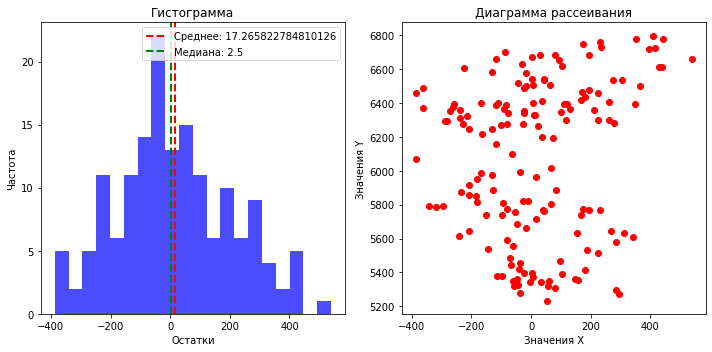

In [107]:
ostatok(residuals, predictions)

- Качество модели улучшилось по сравнению с 2 моделью. У второй 0.85. У третьей 0.87. 
- На гистограмме видно, что расстояние от графика увеличилось. Было 2 на 2 модели, на третьей стало 10. 
- R2 = 0.8710832072236283
- MAE = 151.21518987341773
- MSE = 35325.240506329115
- RMSE = 187.95010110752565


**Модель 1**
- R2 = 0.8214060419324506
- MAE = 179.60759493670886
- MSE = 48937.56962025316
- RMSE = 221.2183754127427

**Модель 2**
- R2 = 0.8555837786541298
- MAE = 157.39240506329114
- MSE = 39572.329113924054
- RMSE = 198.92794955441545

**Модель 3**
- R2 = 0.8710832072236283
- MAE = 151.21518987341773
- MSE = 35325.240506329115
- RMSE = 187.95010110752565

**По всем метрикам самая лучшая модел номер 3/ У неё наименьшая ошибка и лучшее качество модели**

# Прогноз удоя коров

In [108]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     629 non-null    int64  
 1   удой,_кг                               629 non-null    int64  
 2   эке_(энергетическая_кормовая_единица)  629 non-null    float64
 3   сырой_протеин,_г                       629 non-null    int64  
 4   спо_(сахаро-протеиновое_соотношение)   629 non-null    float64
 5   порода                                 629 non-null    object 
 6   тип_пастбища                           629 non-null    object 
 7   порода_папы_быка                       629 non-null    object 
 8   жирность,%                             629 non-null    float64
 9   белок,%                                629 non-null    float64
 10  вкус_молока                            629 non-null    object 
 11  возрас

In [109]:
data_cow.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис_Бик_Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис_Бик_Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,Рефлешн_Соверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,Рефлешн_Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,Рефлешн_Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [110]:
data_cow['эке_(энергетическая_кормовая_единица)'] = data_main['эке_(энергетическая_кормовая_единица)'].mean()*1.05
data_cow['спо_(сахаро-протеиновое_соотношение)'] = data_main['спо_(сахаро-протеиновое_соотношение)'].mean()*1.05
data_cow['сырой_протеин,_г'] = data_main['сырой_протеин,_г'].mean()*1.05
data_cow['спо_бинарный'] = (data_cow['спо_(сахаро-протеиновое_соотношение)']>0.91).astype(int)
data_cow['эке_в_квадрате'] = data_cow['эке_(энергетическая_кормовая_единица)']**2
data_cow_regression = data_cow.drop(['текущая_жирность,%', 'текущий_уровень_белок,%', 'эке_(энергетическая_кормовая_единица)', 'спо_(сахаро-протеиновое_соотношение)'], axis=1)

In [111]:
data_cow_regression.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,возраст,"сырой_протеин,_г",спо_бинарный,эке_в_квадрате
0,Вис_Бик_Айдиал,холмистое,Айдиал,Геркулес,более_2_лет,2019.532273,1,233.205675
1,Вис_Бик_Айдиал,равнинное,Соверин,Буйный,менее_2_лет,2019.532273,1,233.205675
2,Рефлешн_Соверинг,равнинное,Соверин,Барин,более_2_лет,2019.532273,1,233.205675
3,Рефлешн_Соверинг,холмистое,Айдиал,Буйный,более_2_лет,2019.532273,1,233.205675
4,Рефлешн_Соверинг,равнинное,Айдиал,Буйный,более_2_лет,2019.532273,1,233.205675


In [112]:
cut_call_name_prognoz = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
cut_scall_name_prognoz = ['сырой_протеин,_г', 'спо_бинарный','эке_в_квадрате']

In [113]:
encoder  = OneHotEncoder(sparse=False)
cow_obj = encoder.fit_transform(data_cow_regression[cut_call_name_prognoz])
encoder_col_names = encoder.get_feature_names()
cow_obj = pd.DataFrame(cow_obj, columns=encoder_col_names)
    

In [114]:
scaler = StandardScaler()
cow_num = scaler.fit_transform(data_cow_regression[cut_scall_name_prognoz])
cow_num = pd.DataFrame(cow_num, columns=cut_scall_name_prognoz)
  

In [115]:
cow_prognoz_regression = pd.concat([cow_obj, cow_num], axis=1)

In [116]:
predictions = model_lr_2.predict(cow_prognoz_regression)
predictions

array([6270., 6016., 5994., 6300., 6248., 6042., 6270., 6226., 5994.,
       6090., 6070., 6252., 6270., 5808., 5994., 6300., 6070., 6042.,
       6226., 6248.])

In [117]:
data_cow['прогнозируемый_удой'] = predictions
data_cow.sort_values(by= 'прогнозируемый_удой',ascending=False)

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,эке_(энергетическая_кормовая_единица),спо_(сахаро-протеиновое_соотношение),"сырой_протеин,_г",спо_бинарный,эке_в_квадрате,прогнозируемый_удой
15,Рефлешн_Соверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6300.0
3,Рефлешн_Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6300.0
0,Вис_Бик_Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6270.0
6,Вис_Бик_Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6270.0
12,Вис_Бик_Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6270.0
11,Рефлешн_Соверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6252.0
19,Рефлешн_Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6248.0
4,Рефлешн_Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6248.0
7,Вис_Бик_Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6226.0
18,Вис_Бик_Айдиал,равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6226.0


# Модель логистическй регрессии

- Целевой признак: вкус молока.
- В данной модели наиболее критичной ошибкой будет, если модель не распознает корову, которая даёт не вкусное молоко.

In [118]:
data_main.head()

,id,"удой,_кг",эке_(энергетическая_кормовая_единица),"сырой_протеин,_г",спо_(сахаро-протеиновое_соотношение),порода,тип_пастбища,порода_папы_быка,"жирность,%","белок,%",вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис_Бик_Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис_Бик_Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,Рефлешн_Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,Рефлешн_Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис_Бик_Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [119]:
data_logistic = pd.merge(data_main, dad, on='id', how='left')
#data_logistic = data_logistic.drop(['жирность,%', 'белок,%'], axis=1)


In [120]:
data_logistic['спо_бинарный'] = (data_logistic['спо_(сахаро-протеиновое_соотношение)'] >0.91).astype(int)
data_logistic['эке_в_квадрате'] = data_logistic['эке_(энергетическая_кормовая_единица)']**2
data_logistic = data_logistic.drop(['id', 'эке_(энергетическая_кормовая_единица)', 'спо_(сахаро-протеиновое_соотношение)'], axis=1)

In [121]:
data_logistic['вкус_молока'].value_counts()

вкусно       371
не вкусно    258
Name: вкус_молока, dtype: int64

In [122]:
def milk(name):
    if name['вкус_молока'] == 'вкусно':
        return 0
    else:
        return 1
data_logistic['вкус_молока'] = data_logistic.apply(milk, axis = 1)

In [123]:
data_logistic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   удой,_кг          629 non-null    int64  
 1   сырой_протеин,_г  629 non-null    int64  
 2   порода            629 non-null    object 
 3   тип_пастбища      629 non-null    object 
 4   порода_папы_быка  629 non-null    object 
 5   жирность,%        629 non-null    float64
 6   белок,%           629 non-null    float64
 7   вкус_молока       629 non-null    int64  
 8   возраст           629 non-null    object 
 9   имя_папы          629 non-null    object 
 10  спо_бинарный      629 non-null    int32  
 11  эке_в_квадрате    629 non-null    float64
dtypes: float64(3), int32(1), int64(3), object(5)
memory usage: 61.4+ KB


In [124]:
cut_call_name = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы', 'спо_бинарный']
cut_scall_name = ['сырой_протеин,_г', 'эке_в_квадрате', 'удой,_кг', 'жирность,%', 'белок,%']

In [125]:
X = data_logistic.drop('вкус_молока' , axis=1)
y = data_logistic['вкус_молока']

In [126]:
X_train, X_test, y_train, y_test = tts(X, y)

In [127]:
X_train_ohn, X_test_ohn = encoder_for(X_train, X_test)

In [128]:
X_train_scall, X_test_scall = scaler_for(X_train, X_test)

In [129]:
X_train = pd.concat([X_train_ohn, X_train_scall], axis=1)
X_test = pd.concat([X_test_ohn, X_test_scall], axis=1)

In [130]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)


In [131]:
def metrix_clf(x, y):
    accuracy = accuracy_score(x, y)
    recall = recall_score(x, y)
    precision = precision_score(x, y)

    return accuracy, recall, precision

In [132]:
accuracy, recall, precision = metrix_clf(y_test, predictions)
print(f'accuracy = {accuracy}')
print(f'recall = {recall}')
print(f'precision = {precision}')

accuracy = 0.6708860759493671
recall = 0.5245901639344263
precision = 0.5818181818181818


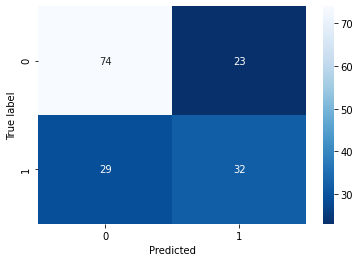

In [133]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Для нашей модели наиболее страшны ошибки, когда не вкусное молоко определяется как вкусное. Наша задача повысить recall, так как она показывает, на сколько правильно модель определяет не вкусное молоко.  

In [134]:
for feature_number, feature_name in enumerate(X.columns):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.6f}") 

удой,_кг            : +0.919713
сырой_протеин,_г    : +1.086770
порода              : +1.368465
тип_пастбища        : +0.730392
порода_папы_быка    : +1.128815
жирность,%          : +0.885456
белок,%             : +0.907303
возраст             : +1.101634
имя_папы            : +0.886216
спо_бинарный        : +0.838722
эке_в_квадрате      : +0.820457


In [135]:
data = pd.DataFrame(zip(y_test, predictions),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.head()) 

     y_valid  y_proba
129        1        1
46         0        1
31         1        1
32         1        1
67         0        1


In [136]:
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 6,endpoint=False)]
print(thresholds) 

[0.1, 0.25, 0.4, 0.55, 0.7, 0.85]


In [137]:
columns = []

for i in thresholds:
	columns.append('y_pred_'+str(i))
	data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>i else 0)

display(data.head(5))

,y_valid,y_proba,y_pred_0.1,y_pred_0.25,y_pred_0.4,y_pred_0.55,y_pred_0.7,y_pred_0.85
129,1,1,1,1,1,1,1,1
46,0,1,1,1,1,1,1,1
31,1,1,1,1,1,1,1,1
32,1,1,1,1,1,1,1,1
67,0,1,1,1,1,1,1,1


In [138]:
threshold = 0.16
y_pred_prob = clf.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > threshold).astype(int)
print(confusion_matrix(y_test, y_pred))
print(metrix_clf(y_test, y_pred))
accuracy, recall, precision = metrix_clf(y_test, y_pred)
print(f'accuracy = {accuracy}')
print(f'recall = {recall}')
print(f'precision = {precision}')

[[ 4 93]
 [ 0 61]]
(0.41139240506329117, 1.0, 0.3961038961038961)
accuracy = 0.41139240506329117
recall = 1.0
precision = 0.3961038961038961


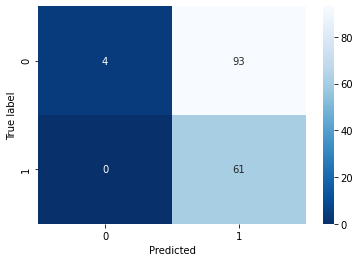

In [139]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

# Прогноз вкуса молока

In [140]:
data_cow.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,эке_(энергетическая_кормовая_единица),спо_(сахаро-протеиновое_соотношение),"сырой_протеин,_г",спо_бинарный,эке_в_квадрате,прогнозируемый_удой
0,Вис_Бик_Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6270.0
1,Вис_Бик_Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6016.0
2,Рефлешн_Соверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,5994.0
3,Рефлешн_Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6300.0
4,Рефлешн_Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6248.0


In [141]:
data_cow_logistic = data_cow.drop(['эке_(энергетическая_кормовая_единица)','спо_(сахаро-протеиновое_соотношение)'], axis=1)

In [142]:
data_cow_logistic.shape

(20, 11)

In [143]:
X.shape

(629, 11)

In [144]:
data_cow_logistic.rename(columns={'прогнозируемый_удой':'удой,_кг', 'текущая_жирность,%':'жирность,%','текущий_уровень_белок,%':'белок,%'}, inplace=True)

In [145]:
data_cow_logistic.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,"жирность,%","белок,%",возраст,"сырой_протеин,_г",спо_бинарный,эке_в_квадрате,"удой,_кг"
0,Вис_Бик_Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.532273,1,233.205675,6270.0
1,Вис_Бик_Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,2019.532273,1,233.205675,6016.0
2,Рефлешн_Соверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2019.532273,1,233.205675,5994.0
3,Рефлешн_Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,2019.532273,1,233.205675,6300.0
4,Рефлешн_Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,2019.532273,1,233.205675,6248.0


In [146]:
cut_call_name = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы', 'спо_бинарный']
cut_scall_name = ['сырой_протеин,_г', 'эке_в_квадрате', 'удой,_кг', 'жирность,%', 'белок,%']

In [147]:
encoder  = OneHotEncoder(sparse=False)
cow_obj_1 = encoder.fit_transform(data_cow_logistic[cut_call_name])
encoder_col_names = encoder.get_feature_names()
cow_obj_1 = pd.DataFrame(cow_obj, columns=encoder_col_names)

In [148]:
scaler = StandardScaler()
cow_num_1 = scaler.fit_transform(data_cow_logistic[cut_scall_name])
cow_num_1 = pd.DataFrame(cow_num_1, columns=cut_scall_name)

In [149]:
cow_prognoz_regression = pd.concat([cow_obj_1, cow_num_1], axis=1)
cow_prognoz_regression['x5_1'] = 1
cow_prognoz_regression['x5_0'] = 0
cow_prognoz_regression.head()

,x0_Вис_Бик_Айдиал,x0_Рефлешн_Соверинг,x1_равнинное,x1_холмистое,x2_Айдиал,x2_Соверин,x3_более_2_лет,x3_менее_2_лет,x4_Барин,x4_Буйный,x4_Геркулес,x4_Соловчик,x5_1,"сырой_протеин,_г",эке_в_квадрате,"удой,_кг","жирность,%","белок,%",x5_0
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,-1.0,0.0,0.977065,0.020225,0.645020,0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,-1.0,0.0,-0.881920,-0.303380,1.141190,0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1,-1.0,0.0,-1.042935,0.101127,0.446553,0
3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,-1.0,0.0,1.196631,-1.436000,-0.843488,0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,-1.0,0.0,0.816051,0.505634,0.446553,0


In [150]:
cow_prognoz_regression.head()

,x0_Вис_Бик_Айдиал,x0_Рефлешн_Соверинг,x1_равнинное,x1_холмистое,x2_Айдиал,x2_Соверин,x3_более_2_лет,x3_менее_2_лет,x4_Барин,x4_Буйный,x4_Геркулес,x4_Соловчик,x5_1,"сырой_протеин,_г",эке_в_квадрате,"удой,_кг","жирность,%","белок,%",x5_0
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,-1.0,0.0,0.977065,0.020225,0.645020,0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,-1.0,0.0,-0.881920,-0.303380,1.141190,0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1,-1.0,0.0,-1.042935,0.101127,0.446553,0
3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,-1.0,0.0,1.196631,-1.436000,-0.843488,0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,-1.0,0.0,0.816051,0.505634,0.446553,0


In [151]:
threshold = 0.16
y_pred_prob = clf.predict_proba(cow_prognoz_regression)[:, 1]
prognoz = (y_pred_prob > threshold).astype(int)


In [152]:
prognoz

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [153]:
data_cow['прогнозируемый_вкус_молока'] = prognoz


In [154]:
def milk_vice_versa(name):
    if name['прогнозируемый_вкус_молока'] == 0:
        return 'вкусно'
    else:
        return 'не вкусно'
data_cow['прогнозируемый_вкус_молока'] = data_cow.apply(milk_vice_versa, axis = 1)

In [155]:
data_cow.head()

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,эке_(энергетическая_кормовая_единица),спо_(сахаро-протеиновое_соотношение),"сырой_протеин,_г",спо_бинарный,эке_в_квадрате,прогнозируемый_удой,прогнозируемый_вкус_молока
0,Вис_Бик_Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6270.0,вкусно
1,Вис_Бик_Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6016.0,не вкусно
2,Рефлешн_Соверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,5994.0,не вкусно
3,Рефлешн_Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6300.0,вкусно
4,Рефлешн_Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6248.0,не вкусно


In [156]:
def desicion(name):
    if name['прогнозируемый_удой'] > 6000 and name['прогнозируемый_вкус_молока'] == 'вкусно':
        return 'брать'
    elif name['прогнозируемый_удой'] > 6000 and name['прогнозируемый_вкус_молока'] != 'вкусно':
        return 'подумать'
    elif name['прогнозируемый_удой'] < 6000 and name['прогнозируемый_вкус_молока'] == 'вкусно':
        return 'подумать'
    else:
        return 'не брать'
data_cow['решение'] = data_cow.apply(desicion, axis = 1)

In [157]:
data_cow.loc[data_cow['решение']=='брать']

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,эке_(энергетическая_кормовая_единица),спо_(сахаро-протеиновое_соотношение),"сырой_протеин,_г",спо_бинарный,эке_в_квадрате,прогнозируемый_удой,прогнозируемый_вкус_молока,решение
0,Вис_Бик_Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6270.0,вкусно,брать
3,Рефлешн_Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6300.0,вкусно,брать
6,Вис_Бик_Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6270.0,вкусно,брать
12,Вис_Бик_Айдиал,холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6270.0,вкусно,брать
15,Рефлешн_Соверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6300.0,вкусно,брать
18,Вис_Бик_Айдиал,равнинное,Соверин,Буйный,3.34,3.069,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6226.0,вкусно,брать


In [158]:
data_cow.loc[data_cow['решение']=='подумать']

,порода,тип_пастбища,порода_папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст,эке_(энергетическая_кормовая_единица),спо_(сахаро-протеиновое_соотношение),"сырой_протеин,_г",спо_бинарный,эке_в_квадрате,прогнозируемый_удой,прогнозируемый_вкус_молока,решение
1,Вис_Бик_Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6016.0,не вкусно,подумать
4,Рефлешн_Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6248.0,не вкусно,подумать
5,Рефлешн_Соверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6042.0,не вкусно,подумать
7,Вис_Бик_Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6226.0,не вкусно,подумать
9,Рефлешн_Соверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6090.0,не вкусно,подумать
10,Вис_Бик_Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6070.0,не вкусно,подумать
11,Рефлешн_Соверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6252.0,не вкусно,подумать
16,Вис_Бик_Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6070.0,не вкусно,подумать
17,Рефлешн_Соверинг,равнинное,Соверин,Геркулес,3.77,3.053,менее_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6042.0,не вкусно,подумать
19,Рефлешн_Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271073,0.958772,2019.532273,1,233.205675,6248.0,не вкусно,подумать
